# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('synthetic_beverage_sales_data.csv')
df = df[0:10000]
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Informasi Mengenai Data
         Unit_Price     Quantity      Discount   Total_Price
count  10000.000000  10000.00000  10000.000000  10000.000000
mean       5.766586     23.06040      0.029065    126.547736
std       14.721471     26.86648      0.044477    496.777802
min        0.320000      1.00000      0.000000      0.390000
25%        1.070000      6.00000      0.000000      8.640000
50%        1.800000     11.00000      0.000000     21.130000
75%        3.210000     29.00000      0.050000     68.322500
max      132.090000    100.00000      0.150000  10112.850000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_P

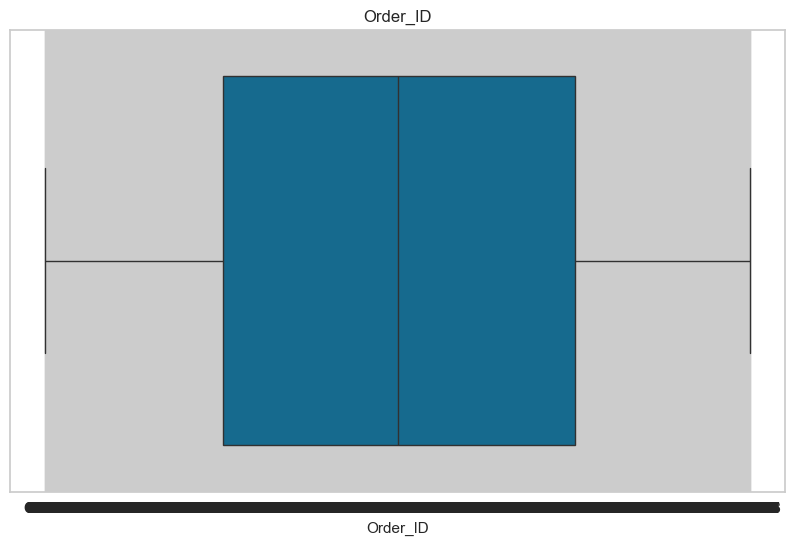

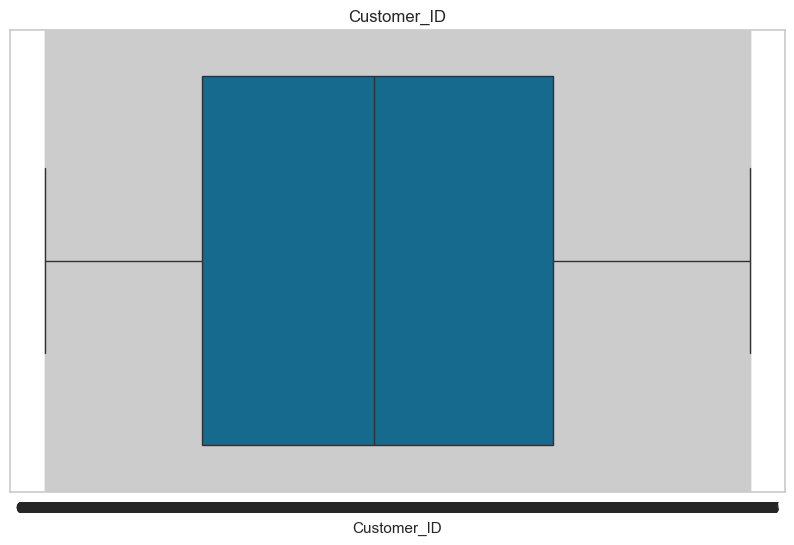

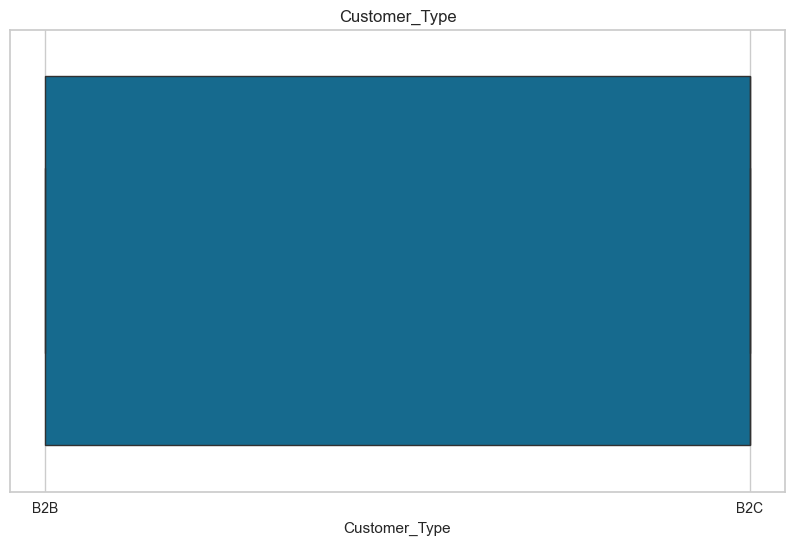

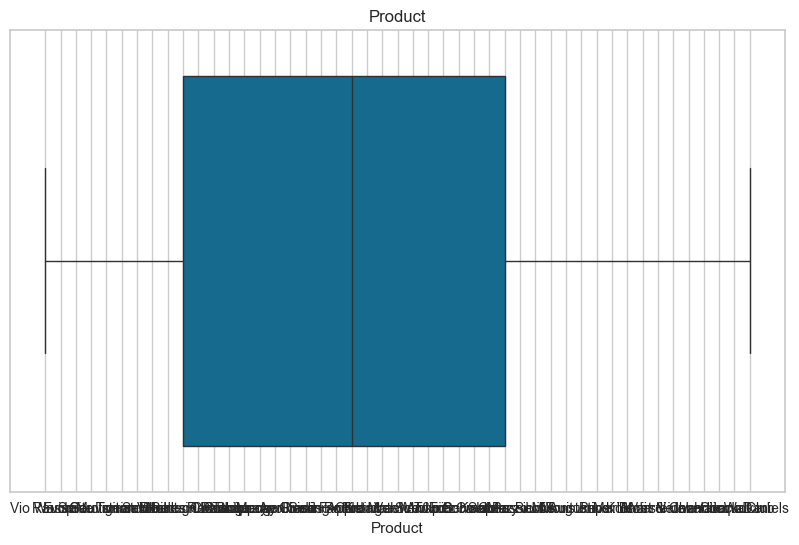

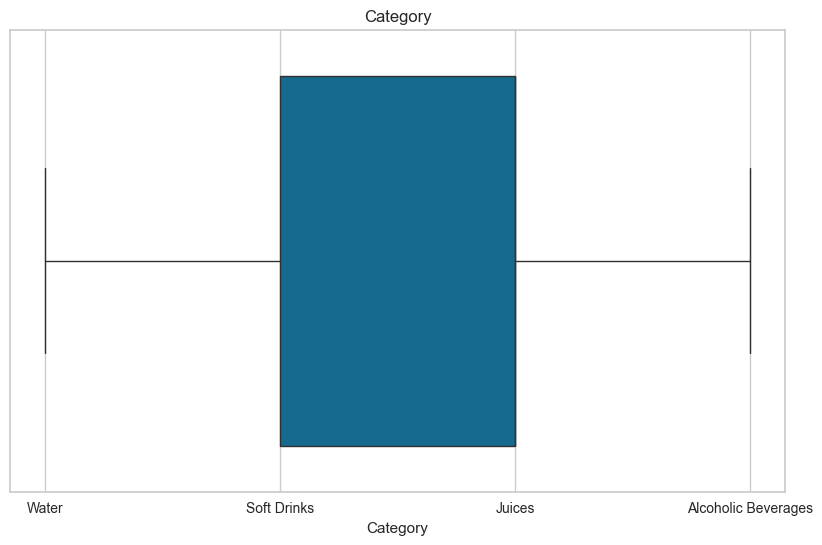

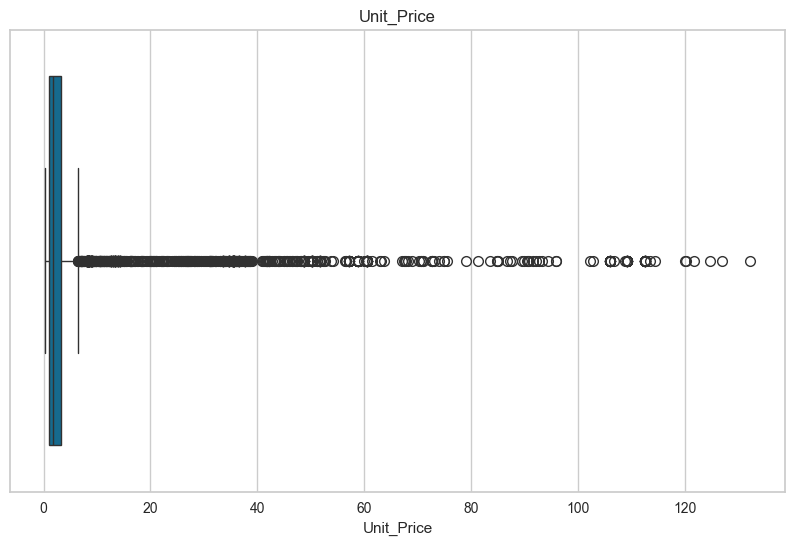

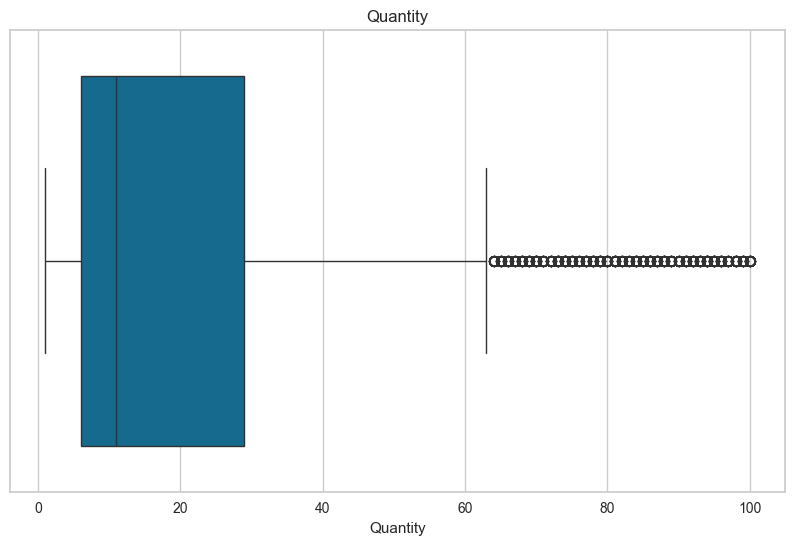

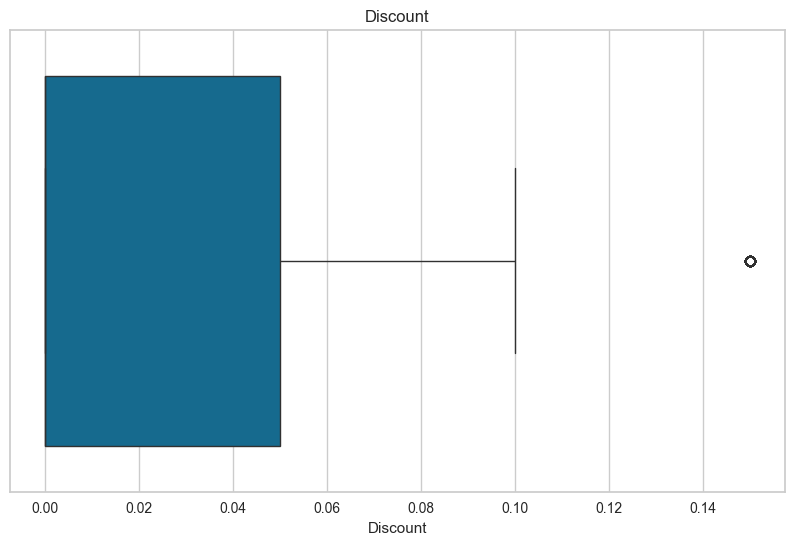

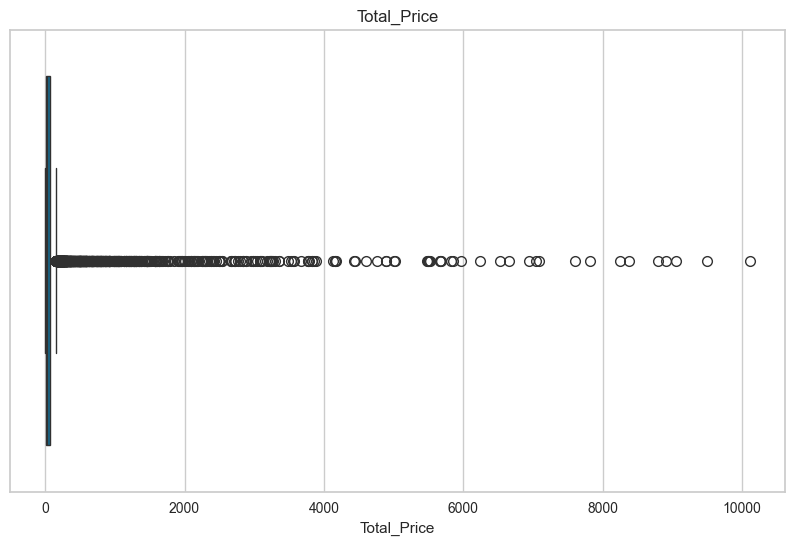

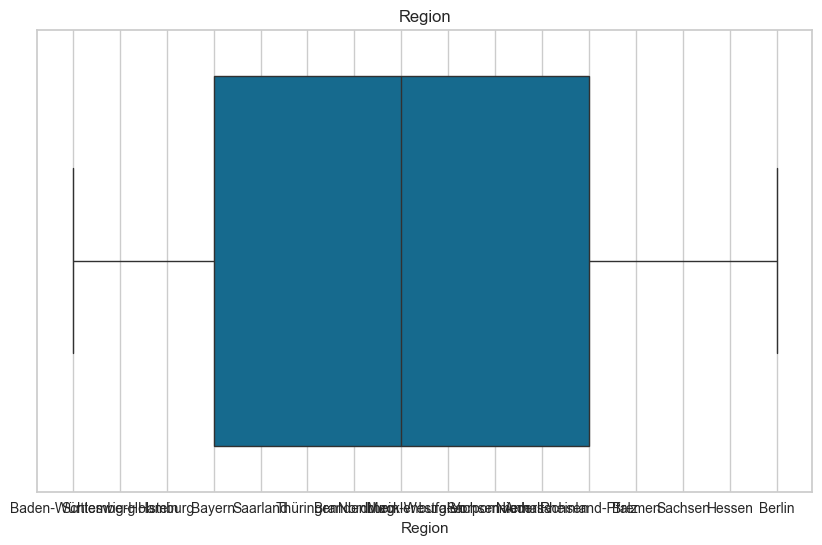

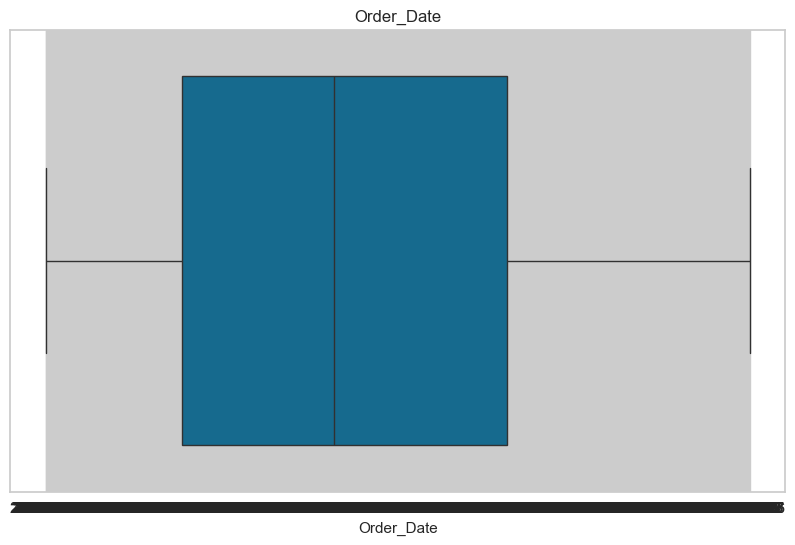

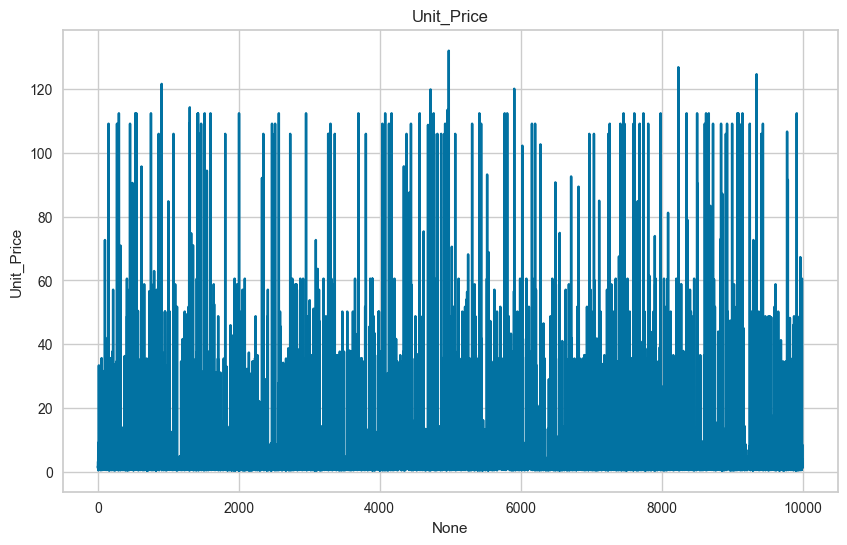

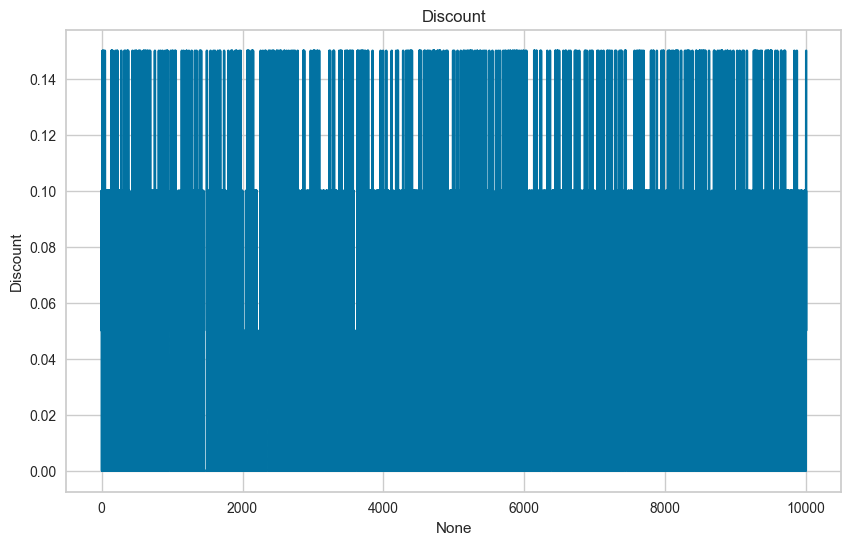

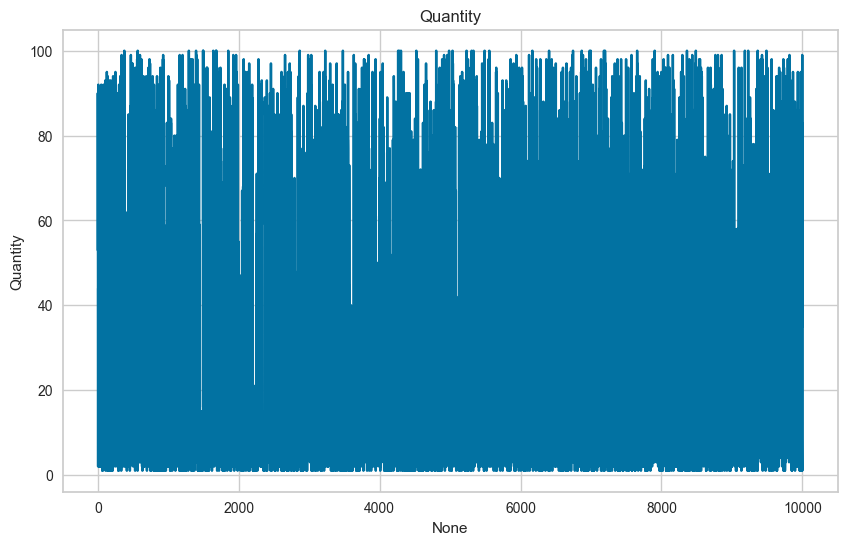

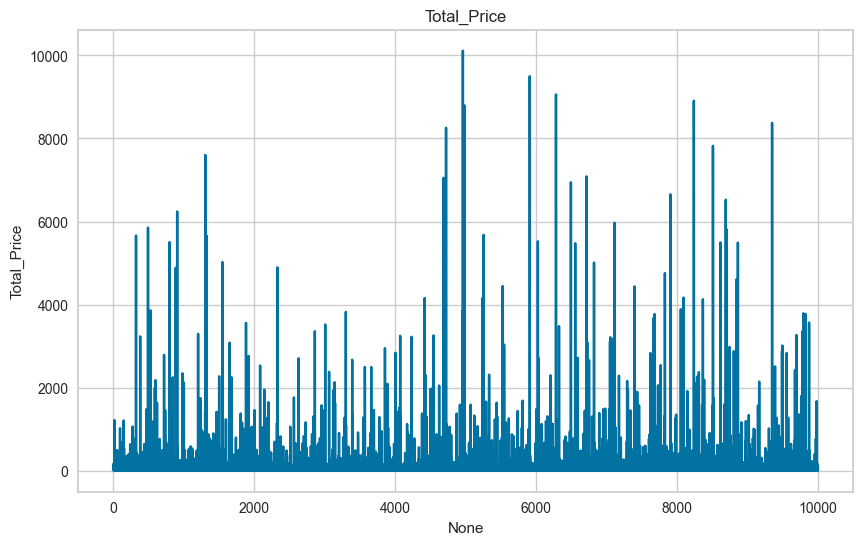

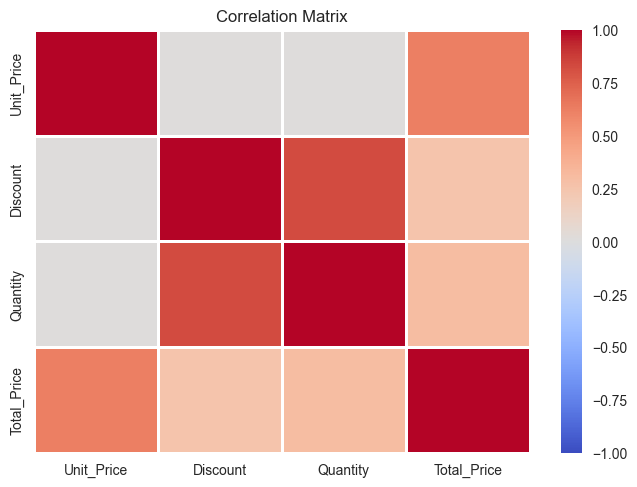

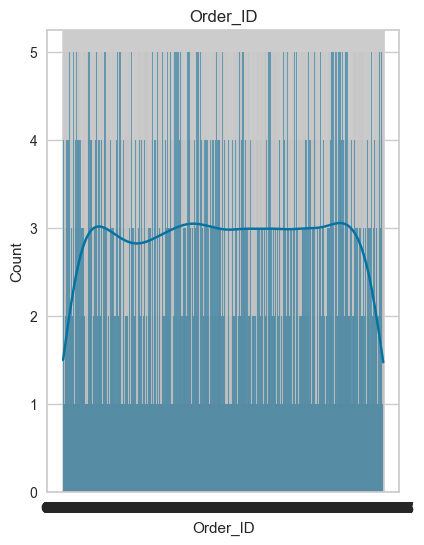

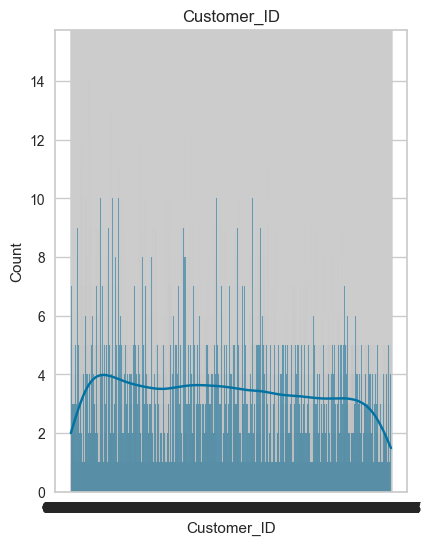

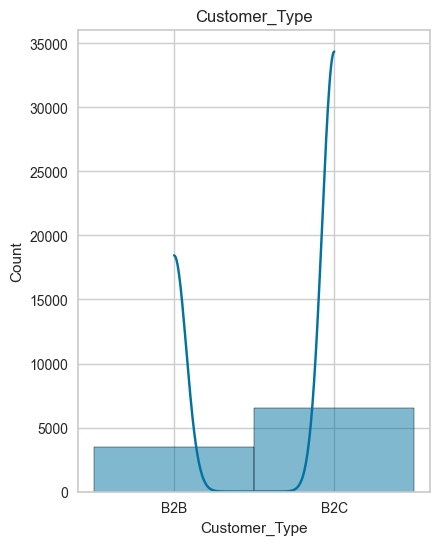

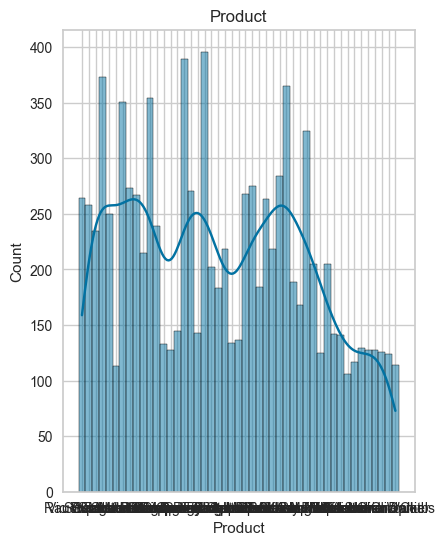

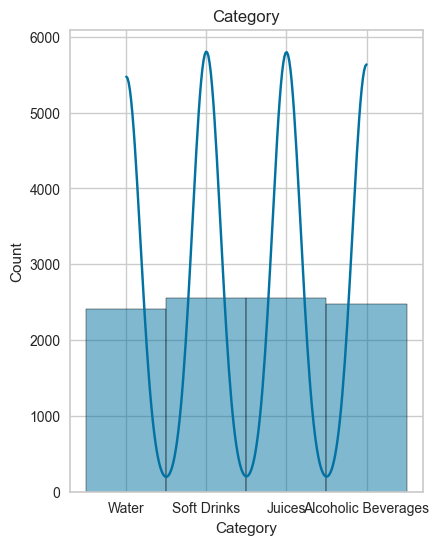

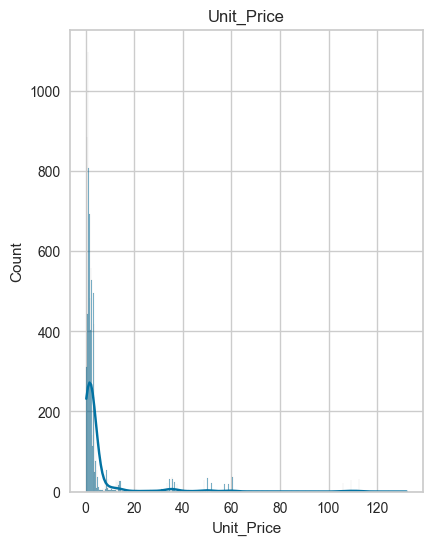

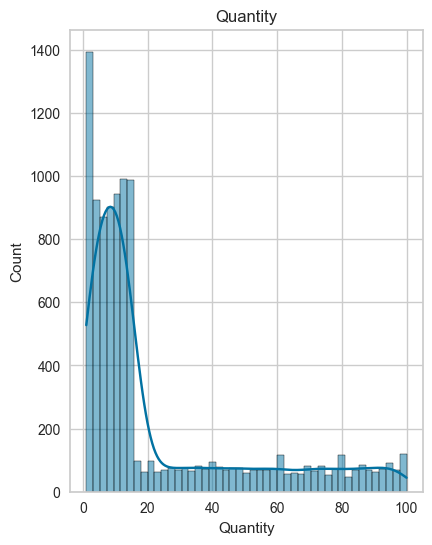

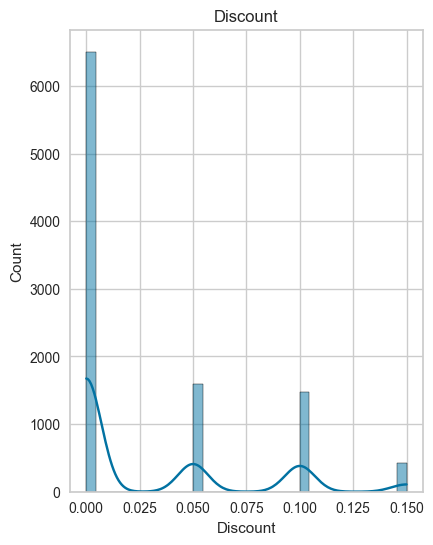

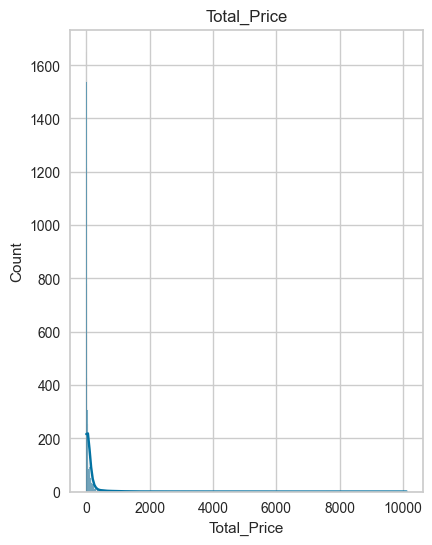

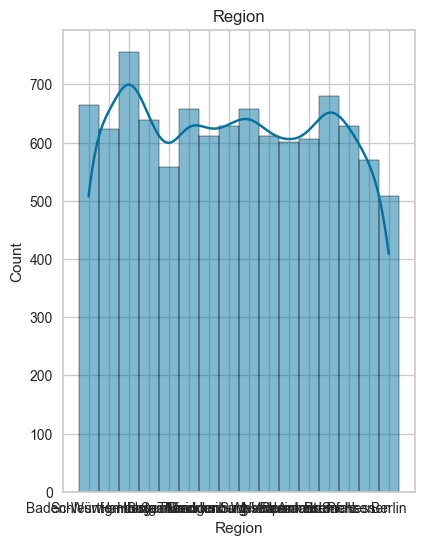

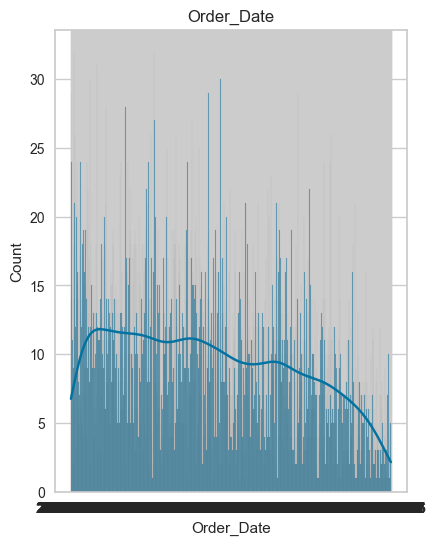

Jumlah data Duplikat : 0


In [4]:
#menampilkan informasi data
print('Informasi Mengenai Data')
print(df.describe())
print(df.info())

#cek data missing
print('Cek Data Hilang')
print(df.isnull().sum())

#cek outlier pada data numerik
print('Cek Outlier')
feature_cols = ['Unit_Price', 'Discount', 'Quantity', 'Total_Price']

for feature in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[feature])
    plt.title(feature)
    plt.show()

#cek grafik sebaran data
for feature in feature_cols:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=df.index, y=df[feature])
    plt.title(feature)
    plt.show()

#cek korelasi antar data numerik
plt.Figure(figsize=(20,10))
sns.heatmap(df[feature_cols].corr(), annot=False, cmap='coolwarm', linewidths=2, vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#cek distribusi data
for feature in df.columns:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
    plt.show()

#Cek data duplikat
print(f'Jumlah data Duplikat : {df.duplicated().sum()}')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

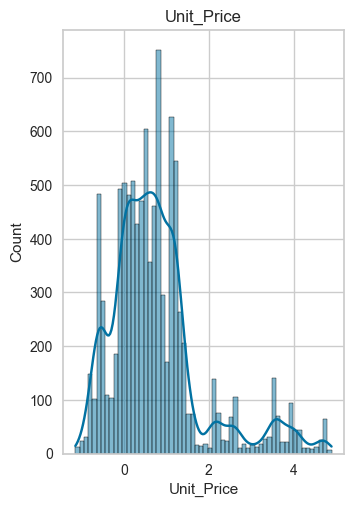

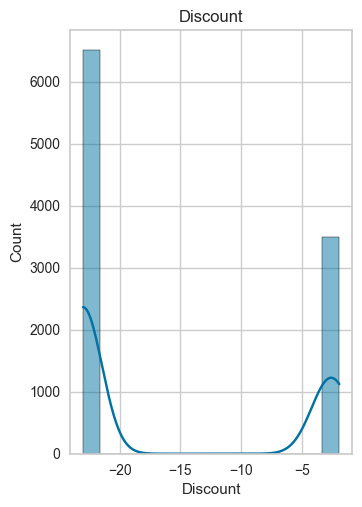

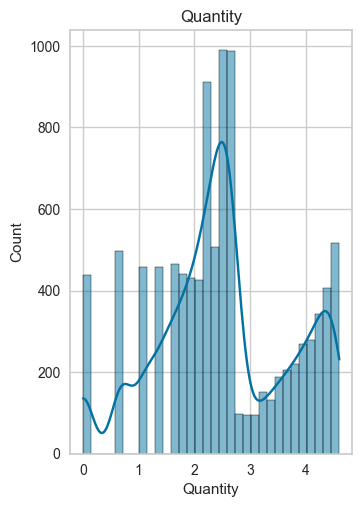

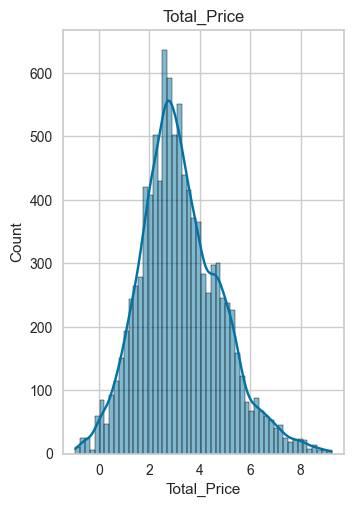

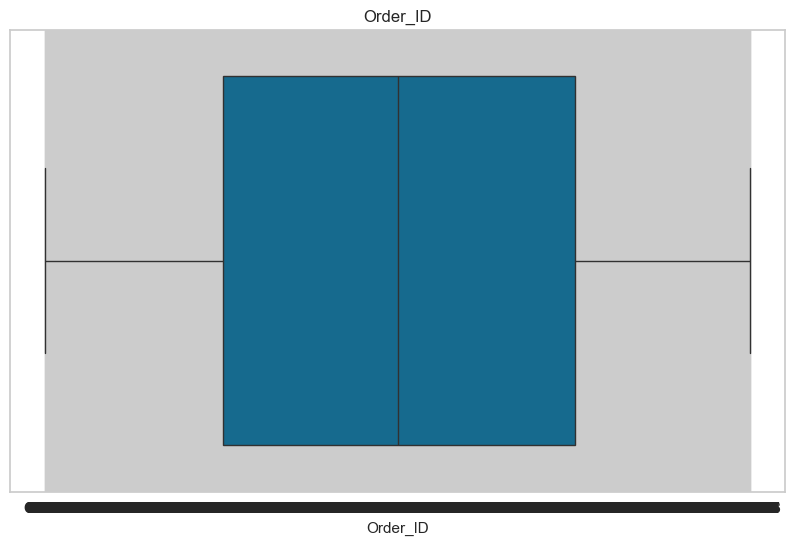

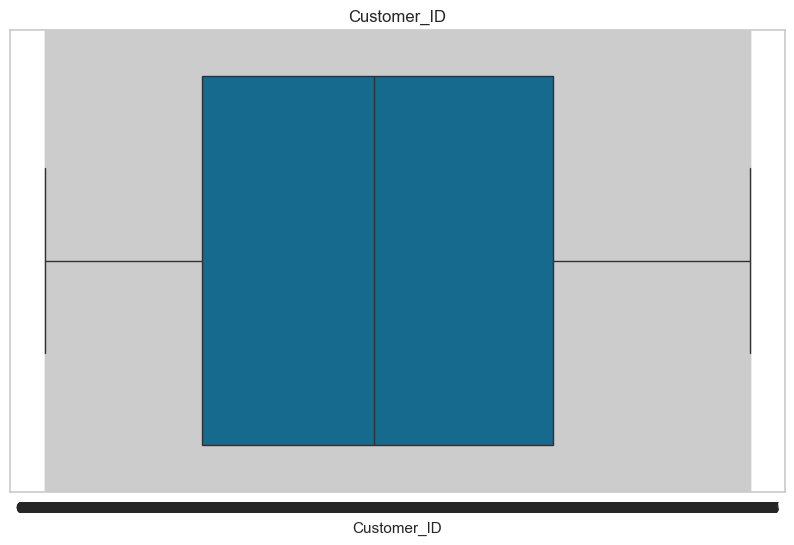

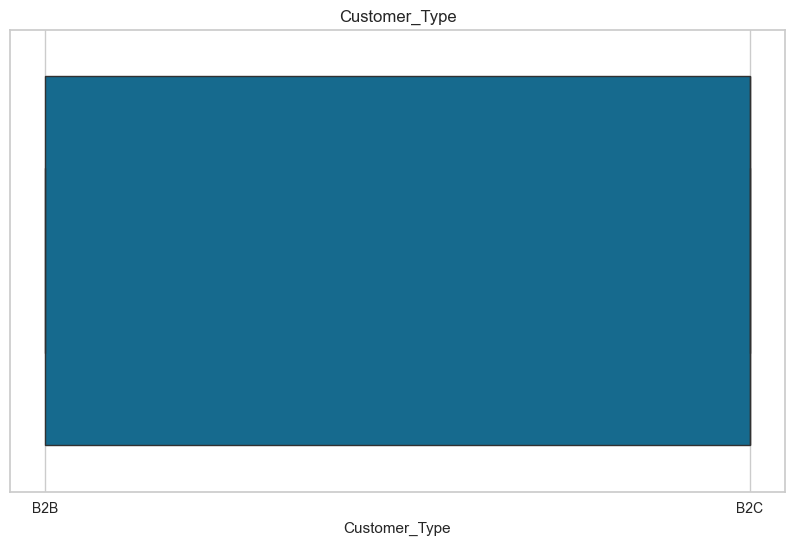

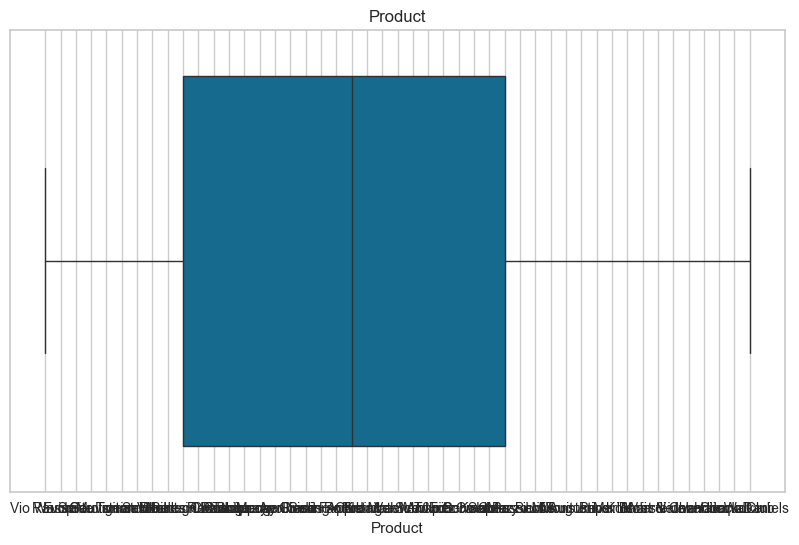

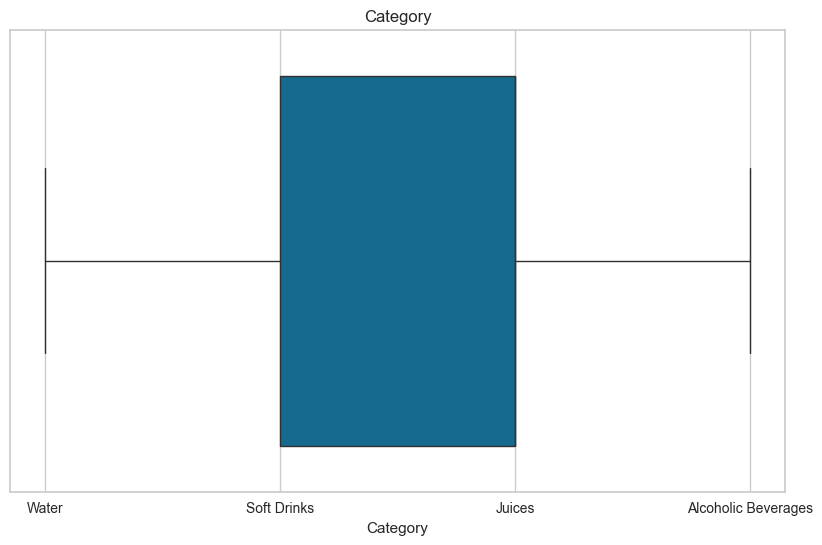

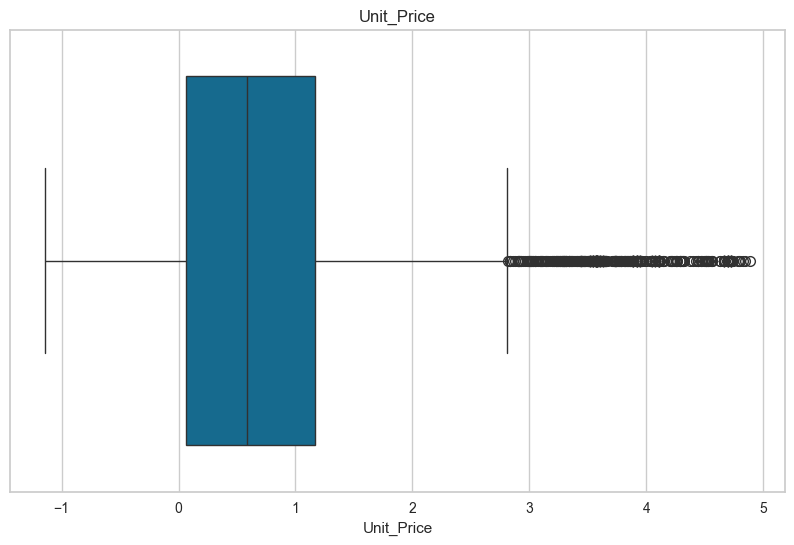

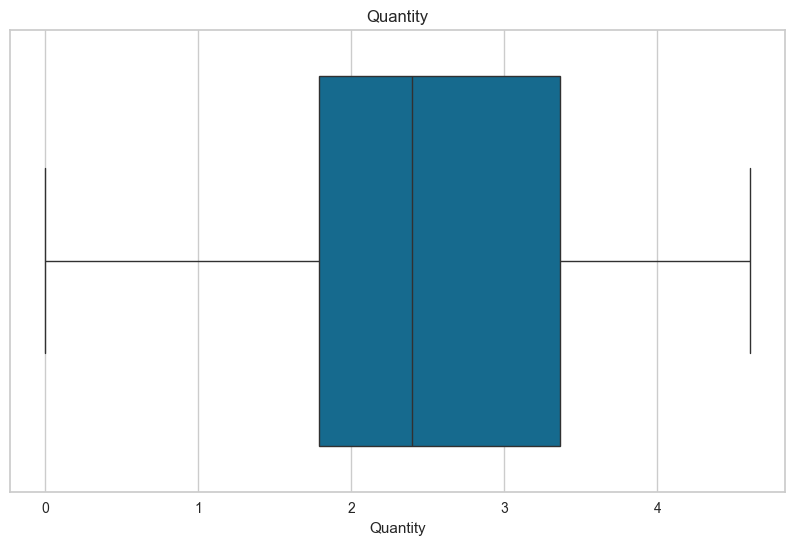

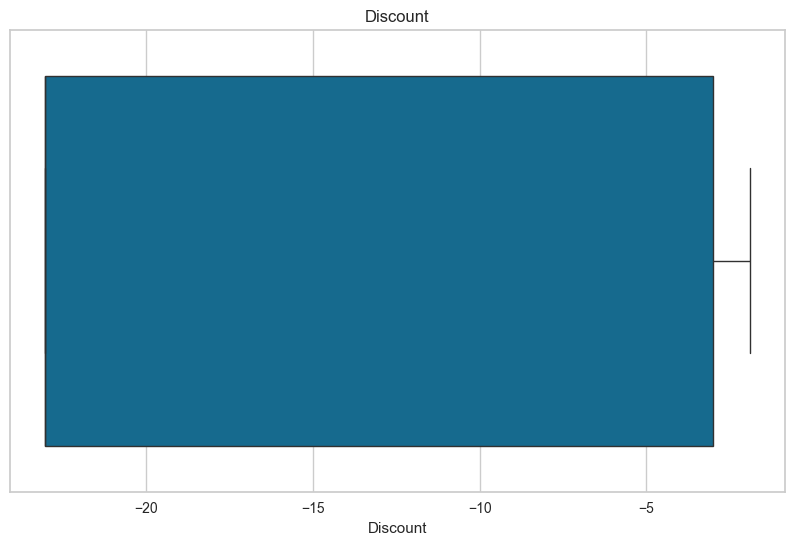

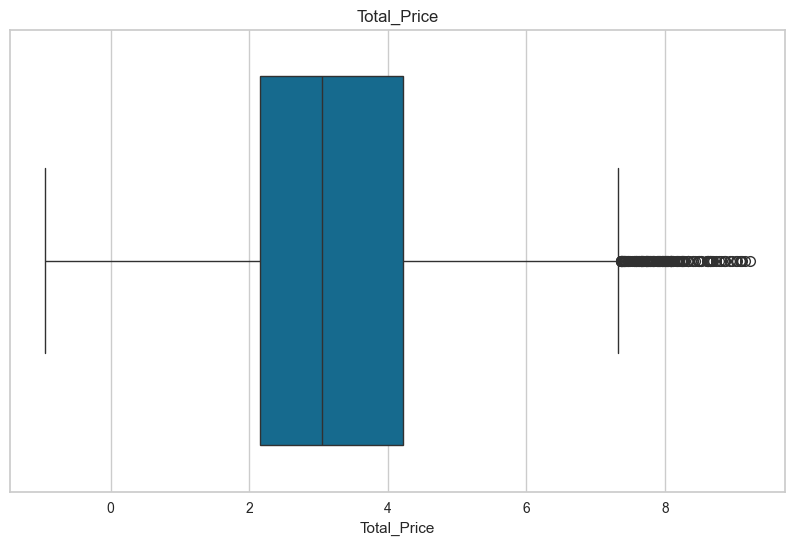

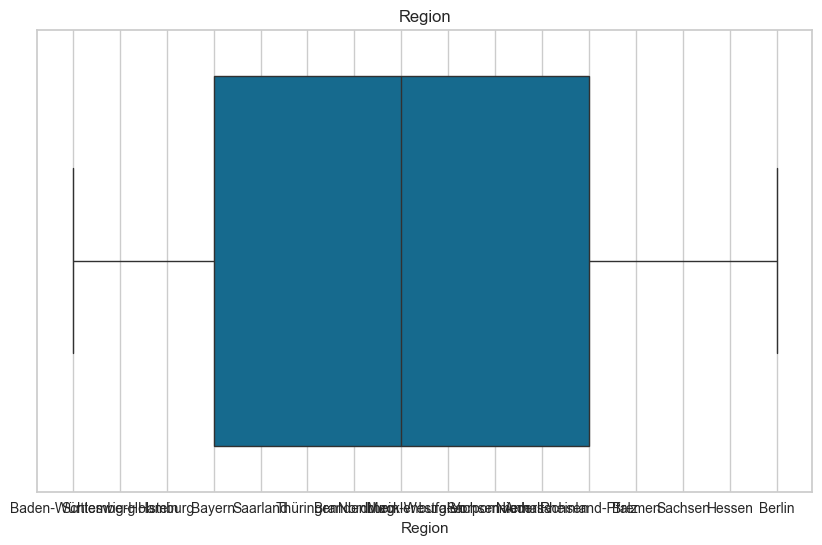

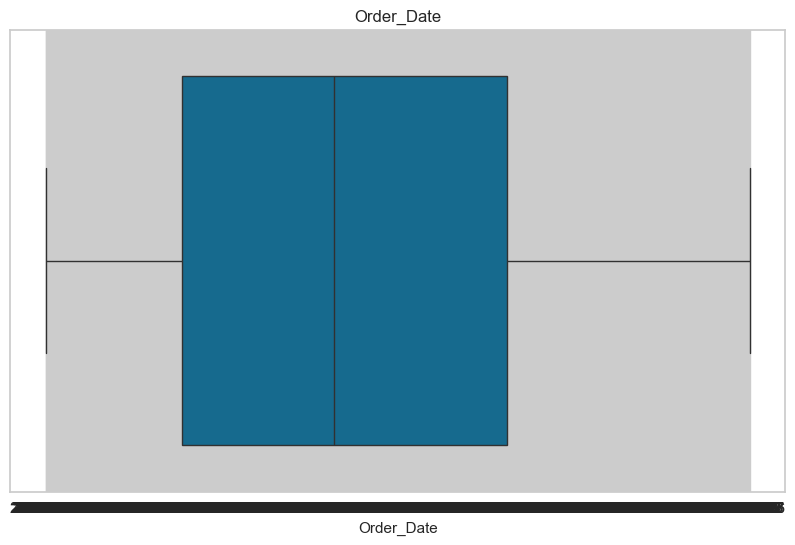

<class 'pandas.core.frame.DataFrame'>
Index: 9246 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9246 non-null   object 
 1   Customer_ID    9246 non-null   object 
 2   Customer_Type  9246 non-null   object 
 3   Product        9246 non-null   object 
 4   Category       9246 non-null   object 
 5   Unit_Price     9246 non-null   float64
 6   Quantity       9246 non-null   int64  
 7   Discount       9246 non-null   float64
 8   Total_Price    9246 non-null   float64
 9   Region         9246 non-null   object 
 10  Order_Date     9246 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 866.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 9246 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9246 non-null   object 
 1   Customer_ID    924

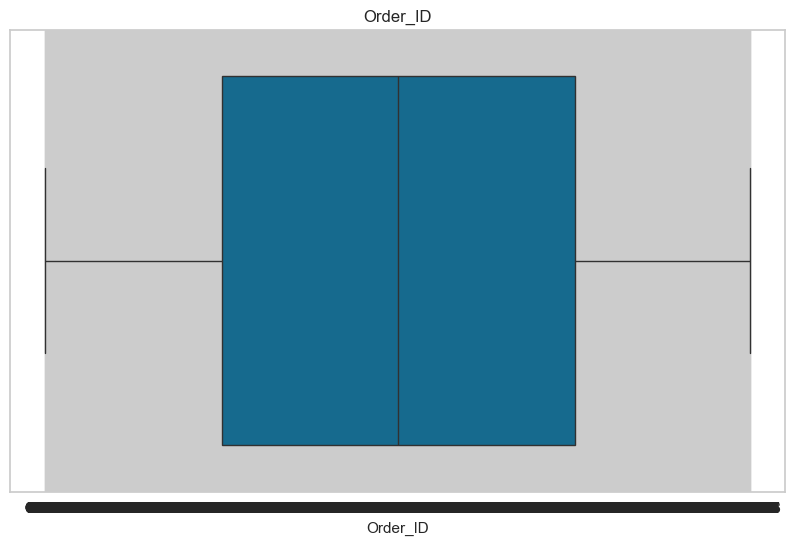

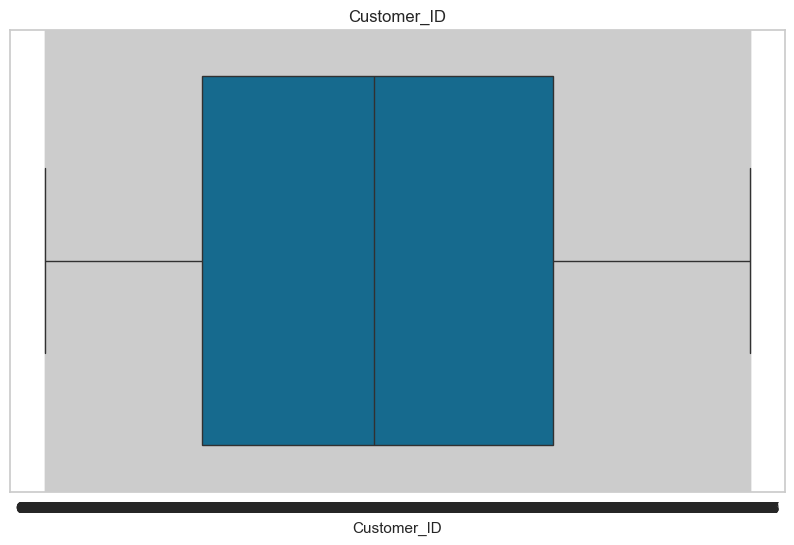

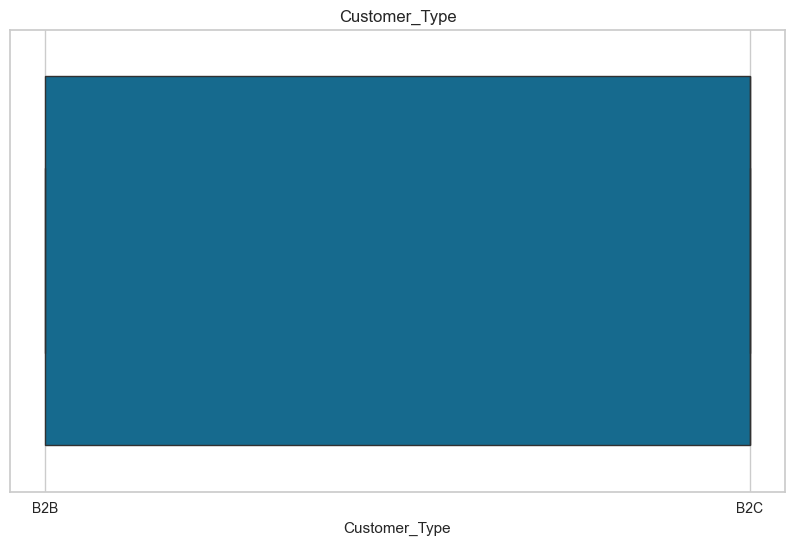

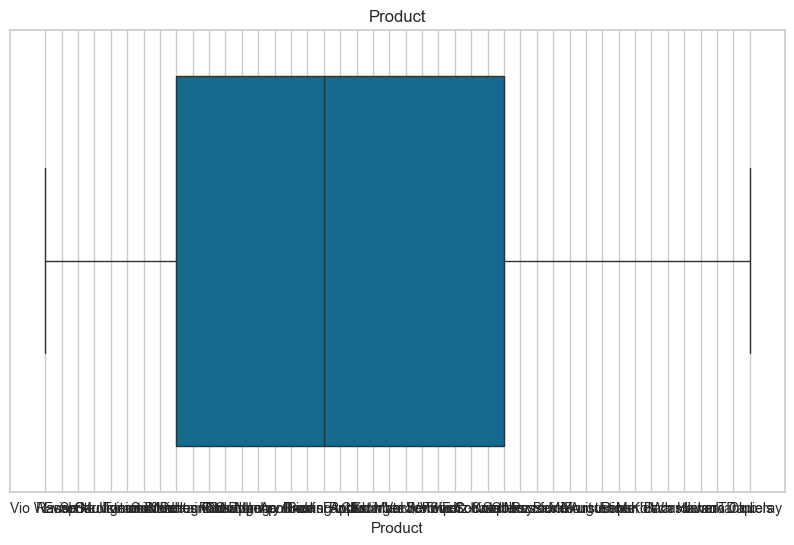

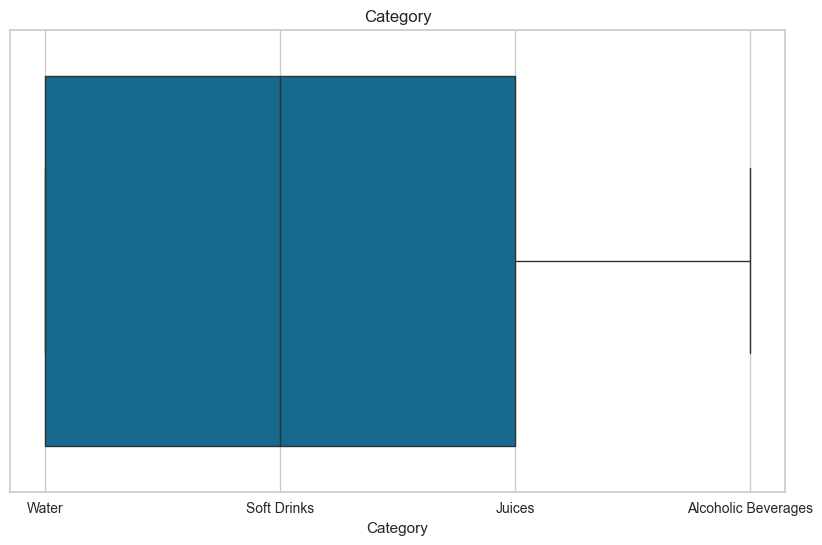

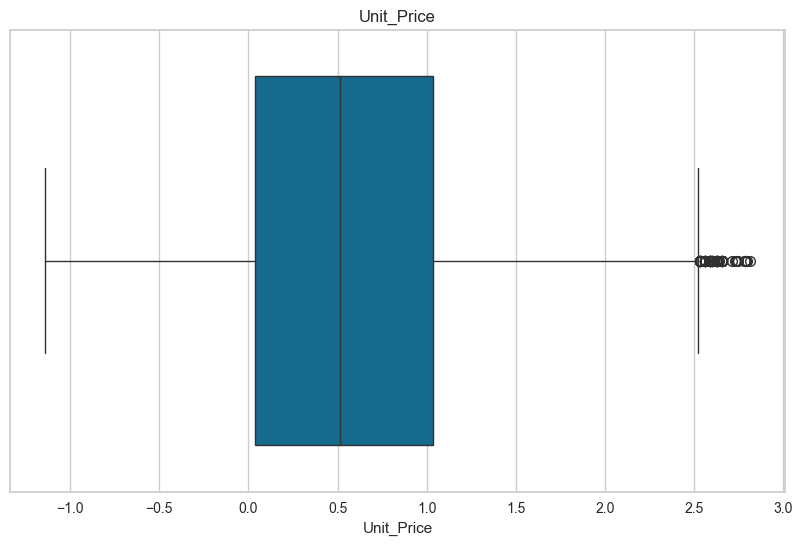

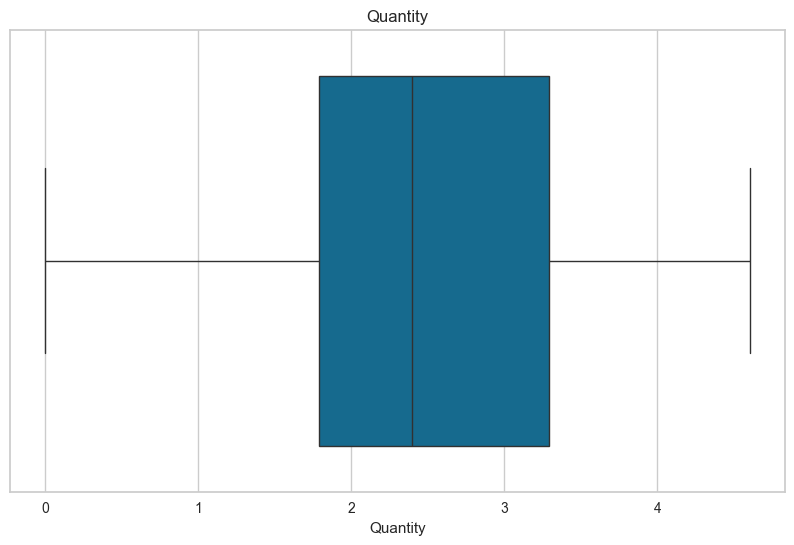

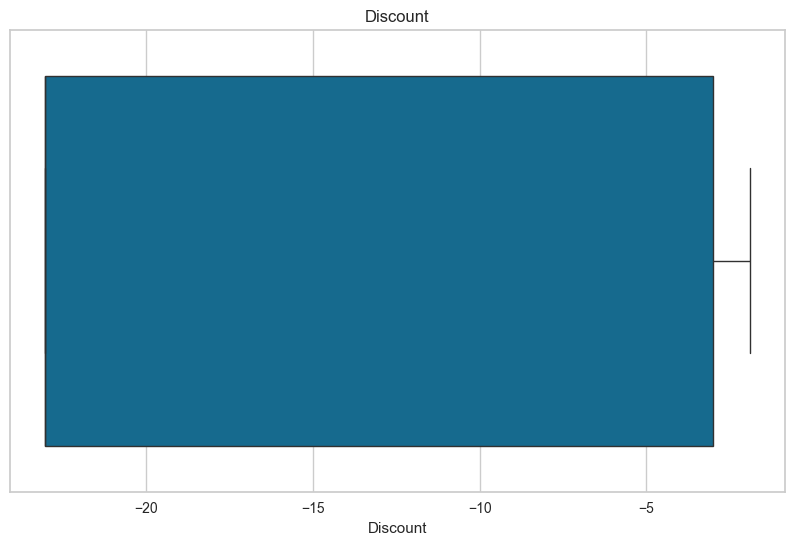

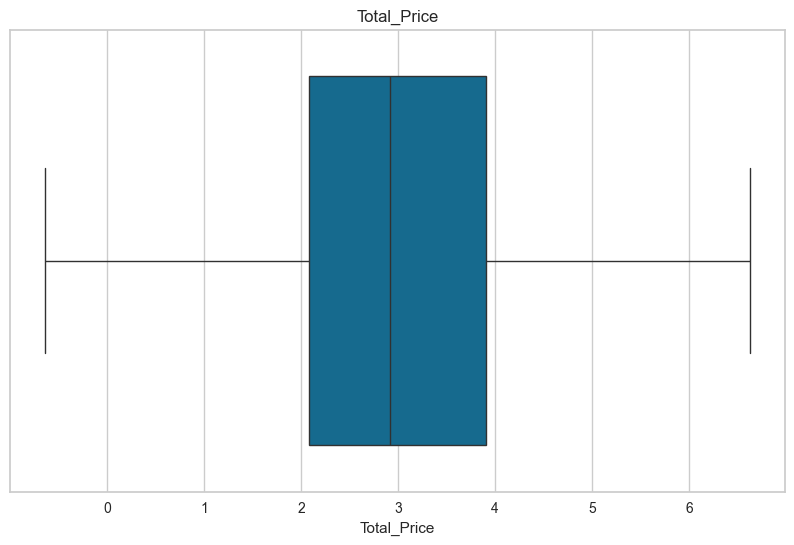

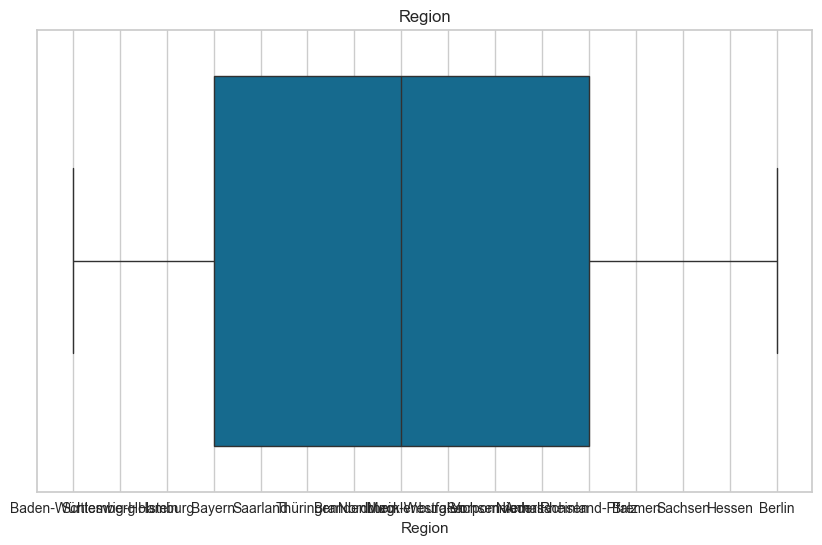

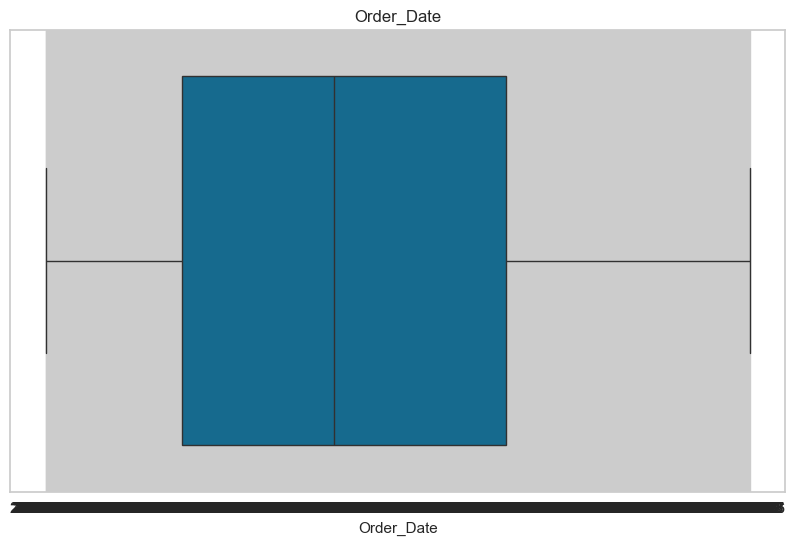

In [5]:
#normalisasi data untuk menangani outlier
df_normalized = df.copy()

for feature in feature_cols:
    df_normalized[feature] = np.log(df_normalized[feature] + 1e-10)

#cek hasil distribusi setelah normalisasi data
for feature in feature_cols:
    plt.Figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df_normalized[feature], kde=True)
    plt.title(feature)
    plt.show()

#cek outlier setelah normalisasi
for feature in df_normalized.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_normalized[feature])
    plt.title(feature)
    plt.show()

#Hapus outlier yang tersisa
for feature in feature_cols:
    Q1 = df_normalized[feature].quantile(0.25)
    Q3 = df_normalized[feature].quantile(0.75)
    IQR = Q3 - Q1
    condition = ~((df_normalized[feature] < (Q1 - 1.5 * IQR)) | (df_normalized[feature] > (Q3 + 1.5 * IQR)))
    df_normalized = df_normalized.loc[condition]
    df = df.loc[condition]

#cek dimensi antara data asli dan hasil normalisasi
print(df.info())
print(df_normalized.info())

#cek outlier setelah penghapusan
for feature in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_normalized[feature])
    plt.title(feature)
    plt.show()

#pengelompokkan data kategorikal
df_normalized['Order_ID'] = df_normalized.groupby('Order_ID').ngroup()
df_normalized['Customer_ID'] = df_normalized.groupby('Customer_ID').ngroup()
df_normalized['Customer_Type'] = df_normalized.groupby('Customer_Type').ngroup()
df_normalized['Product'] = df_normalized.groupby('Product').ngroup()
df_normalized['Category'] = df_normalized.groupby('Category').ngroup()
df_normalized['Region'] = df_normalized.groupby('Region').ngroup()
df_normalized['Order_Date'] = df_normalized.groupby('Order_Date').ngroup()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

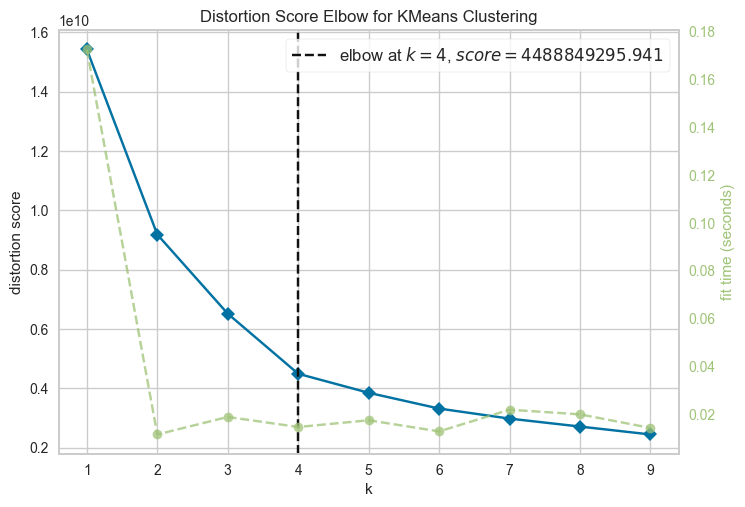

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
#Pembangunan model
#Menentukan parameter yang optimal dengan KElbow dan juga Silhouette Score
KMeans_model = KMeans()
visualizer = KElbowVisualizer(KMeans_model, k=(1,10))
visualizer.fit(df_normalized)
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [7]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_normalized)

labels = kmeans.labels_
sil_score = silhouette_score(df_normalized, labels)
print(f'Silhouette Score : {sil_score:.4f}')

Silhouette Score : 0.3572


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [8]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

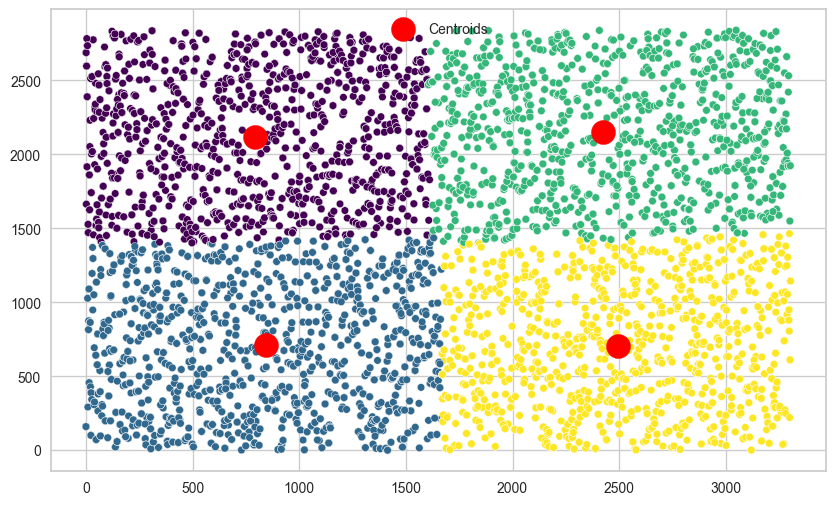

In [9]:
#visualisasi hasil clustering
centroids = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(10, 6))

x_array = df_normalized.values 

ax.scatter(x_array[:, 0], x_array[:, 1], c=labels, cmap='viridis', s=30, edgecolors='w', marker='o')

ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')

plt.legend()

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [10]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [11]:
# Saya melakukan Normalisasi namun tetap menyimpan data asli jadi inverse TIDAK DIPERLUKAN

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Label dan key
                  Product  Grouped_ID
17            Apollinaris           0
68             Augustiner           1
91                Bacardi           2
52                 Beck's           3
13             Chardonnay           4
26              Club Mate           5
42              Coca-Cola           6
44        Cranberry Juice           7
30      Erdinger Weißbier           8
1                   Evian           9
23                  Fanta          10
38             Fritz-Kola          11
4            Gerolsteiner          12
22          Granini Apple          13
485           Havana Club          14
11         Hohes C Orange          15
2260         Jack Daniels          16
104                 Jever          17
29             Krombacher          18
84                 Kölsch          19
16            Mango Juice          20
83                 Merlot          21
49              Mezzo Mix          22
66                Monster          23
10           Mountain Dew          2

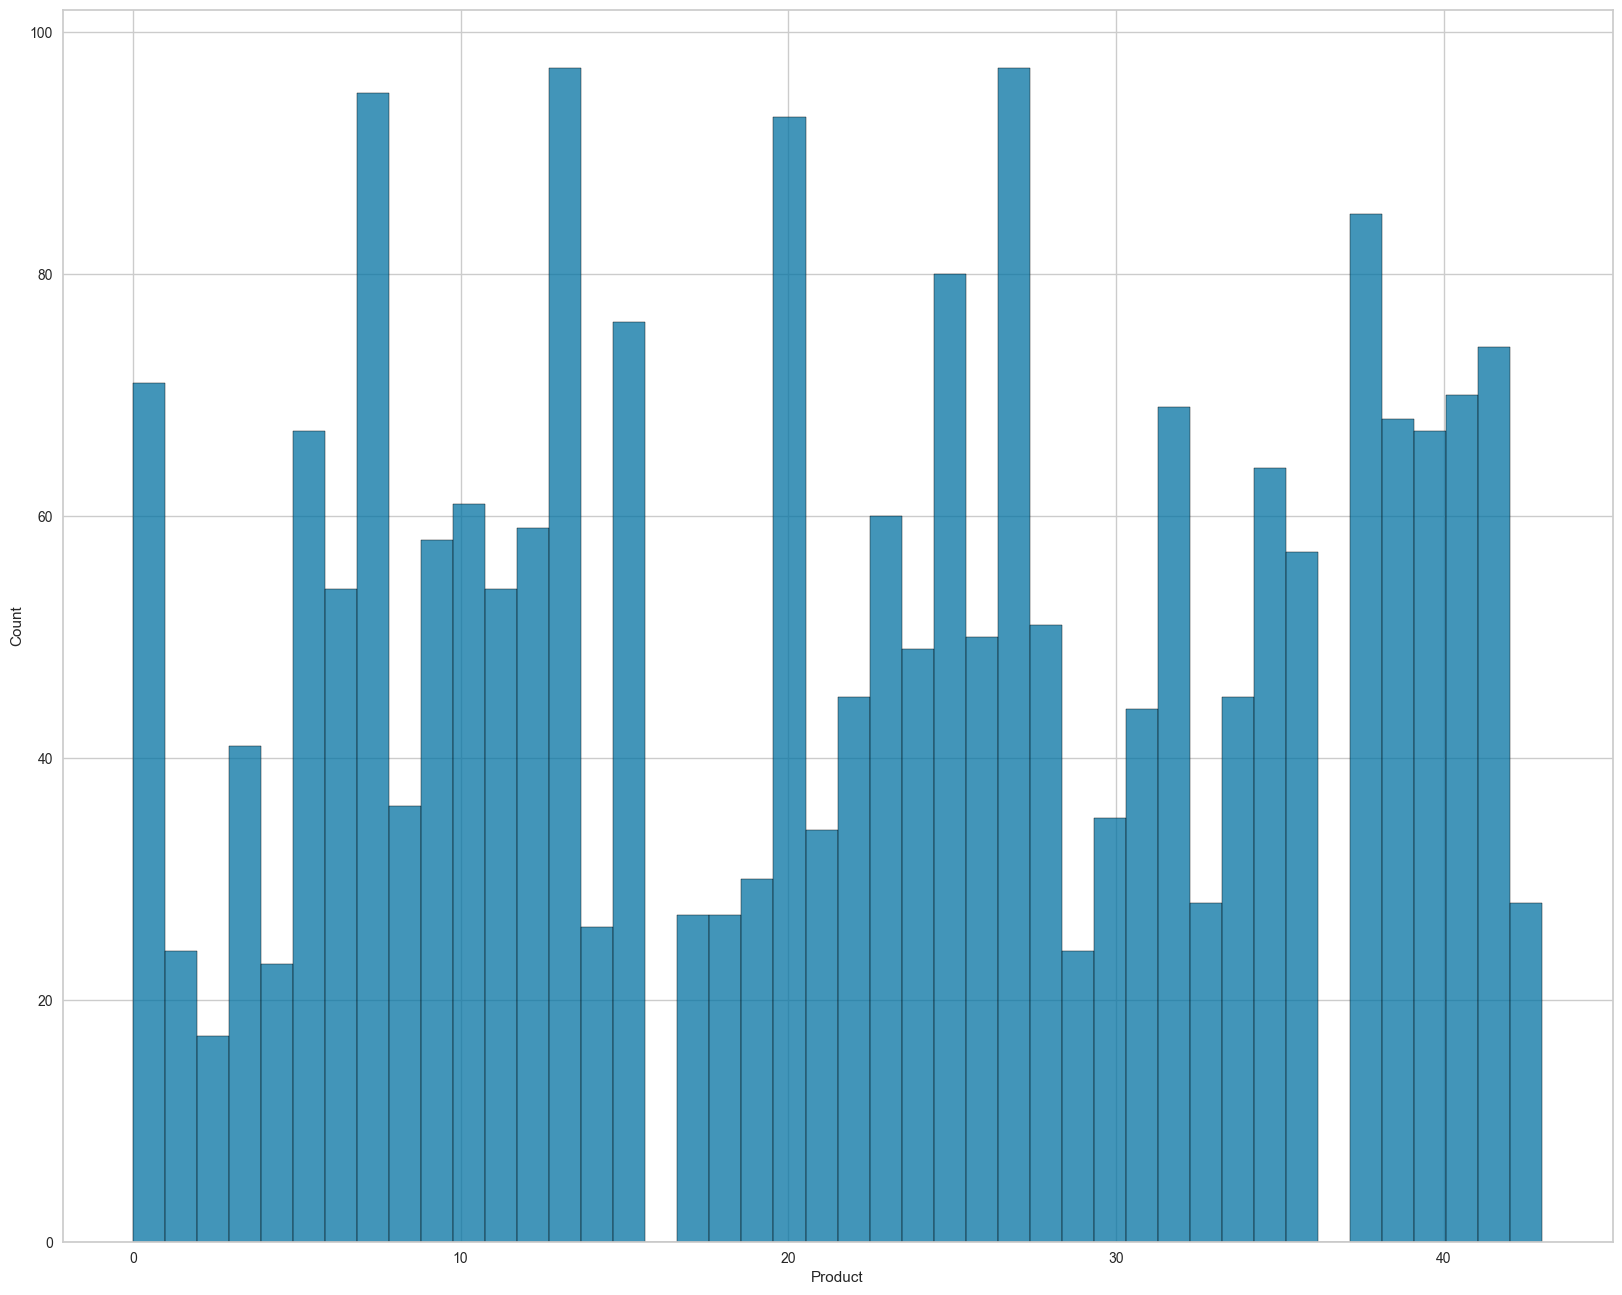

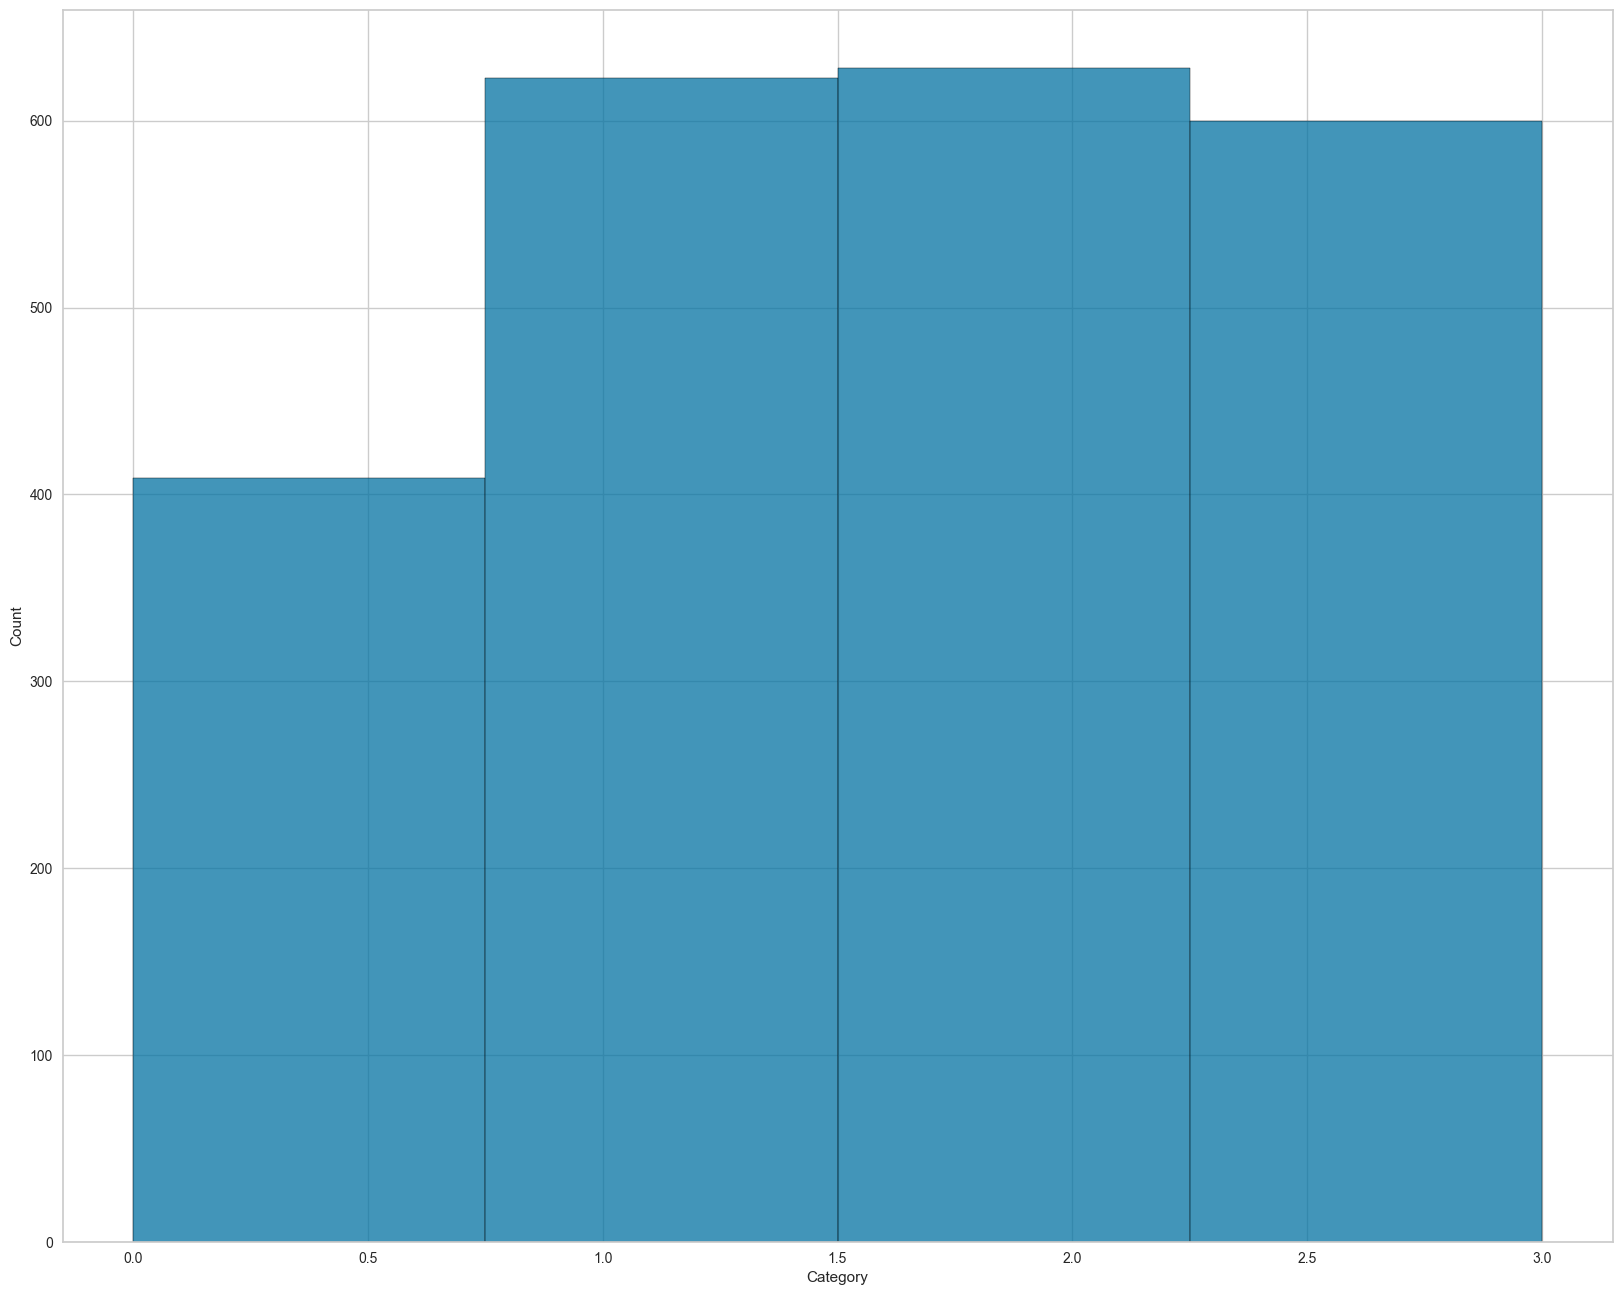

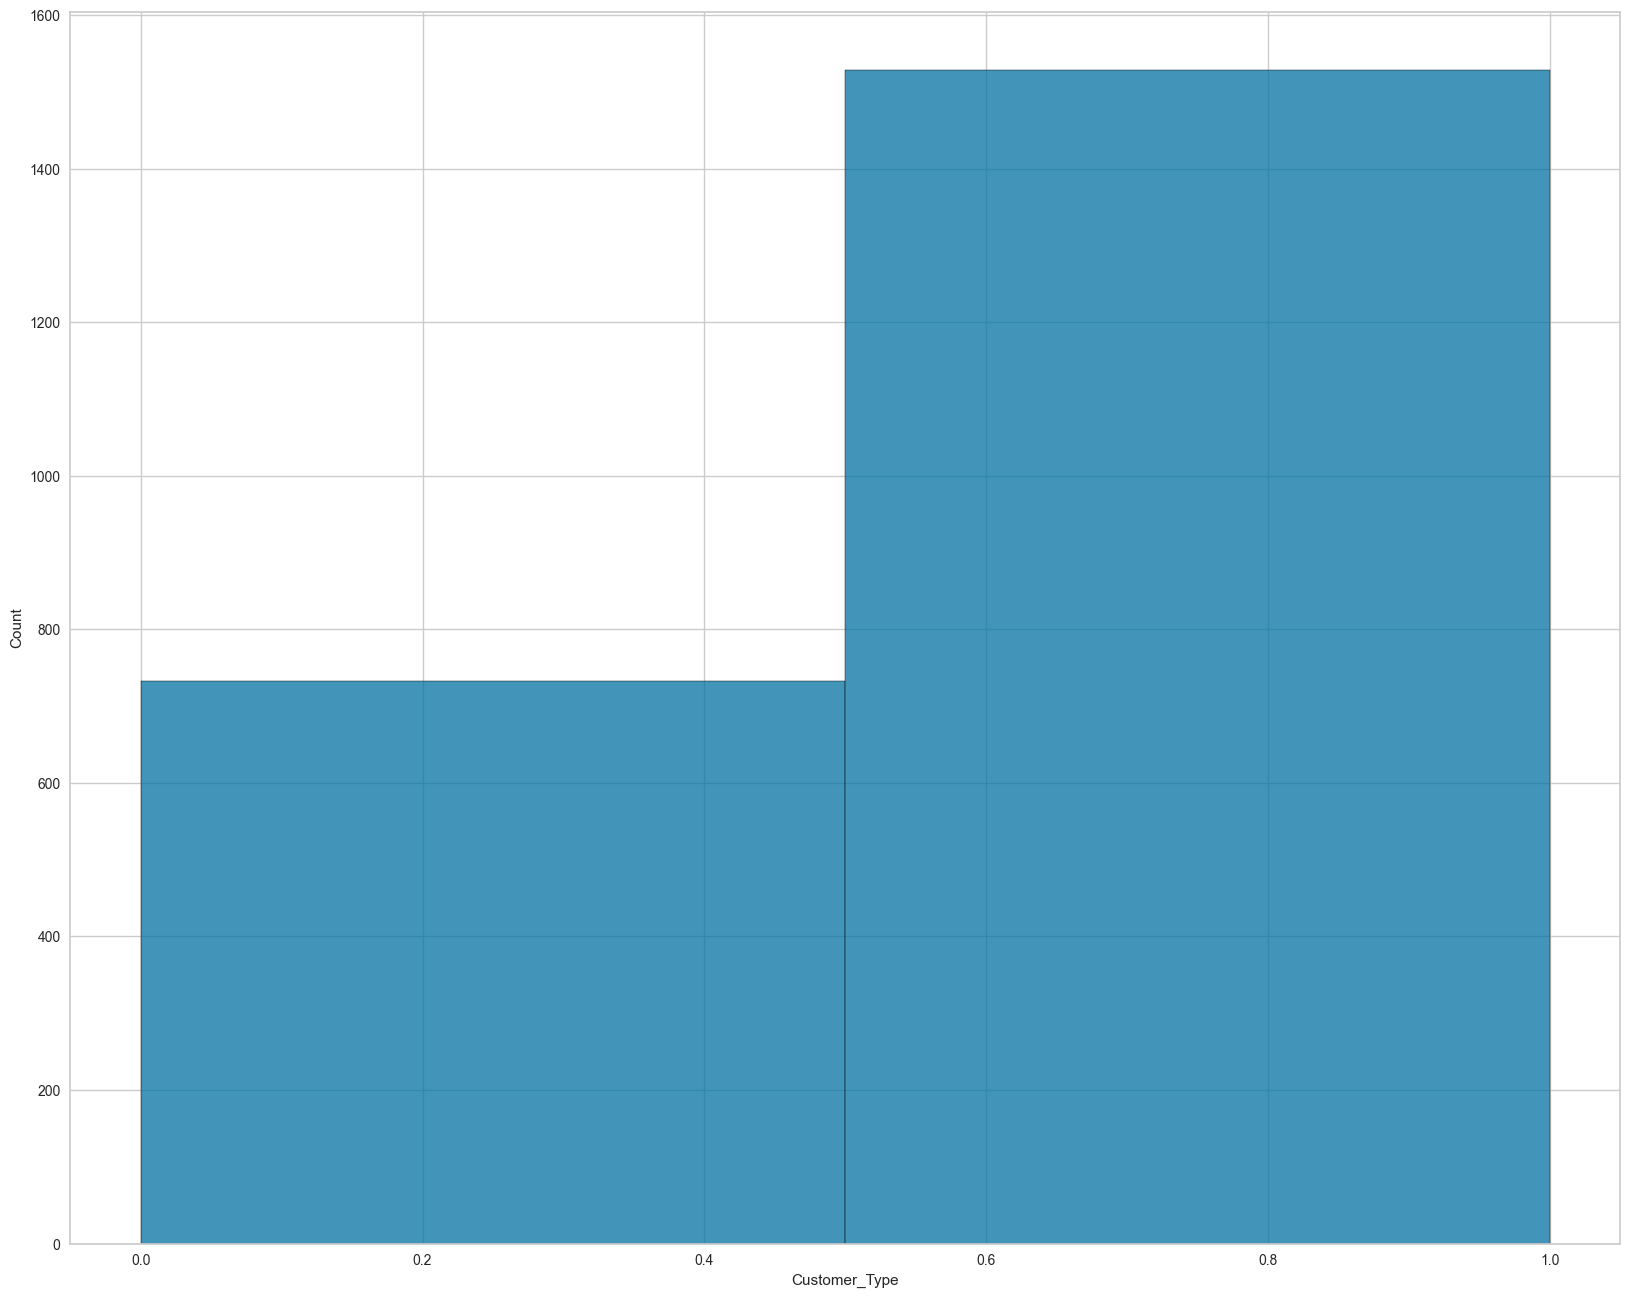

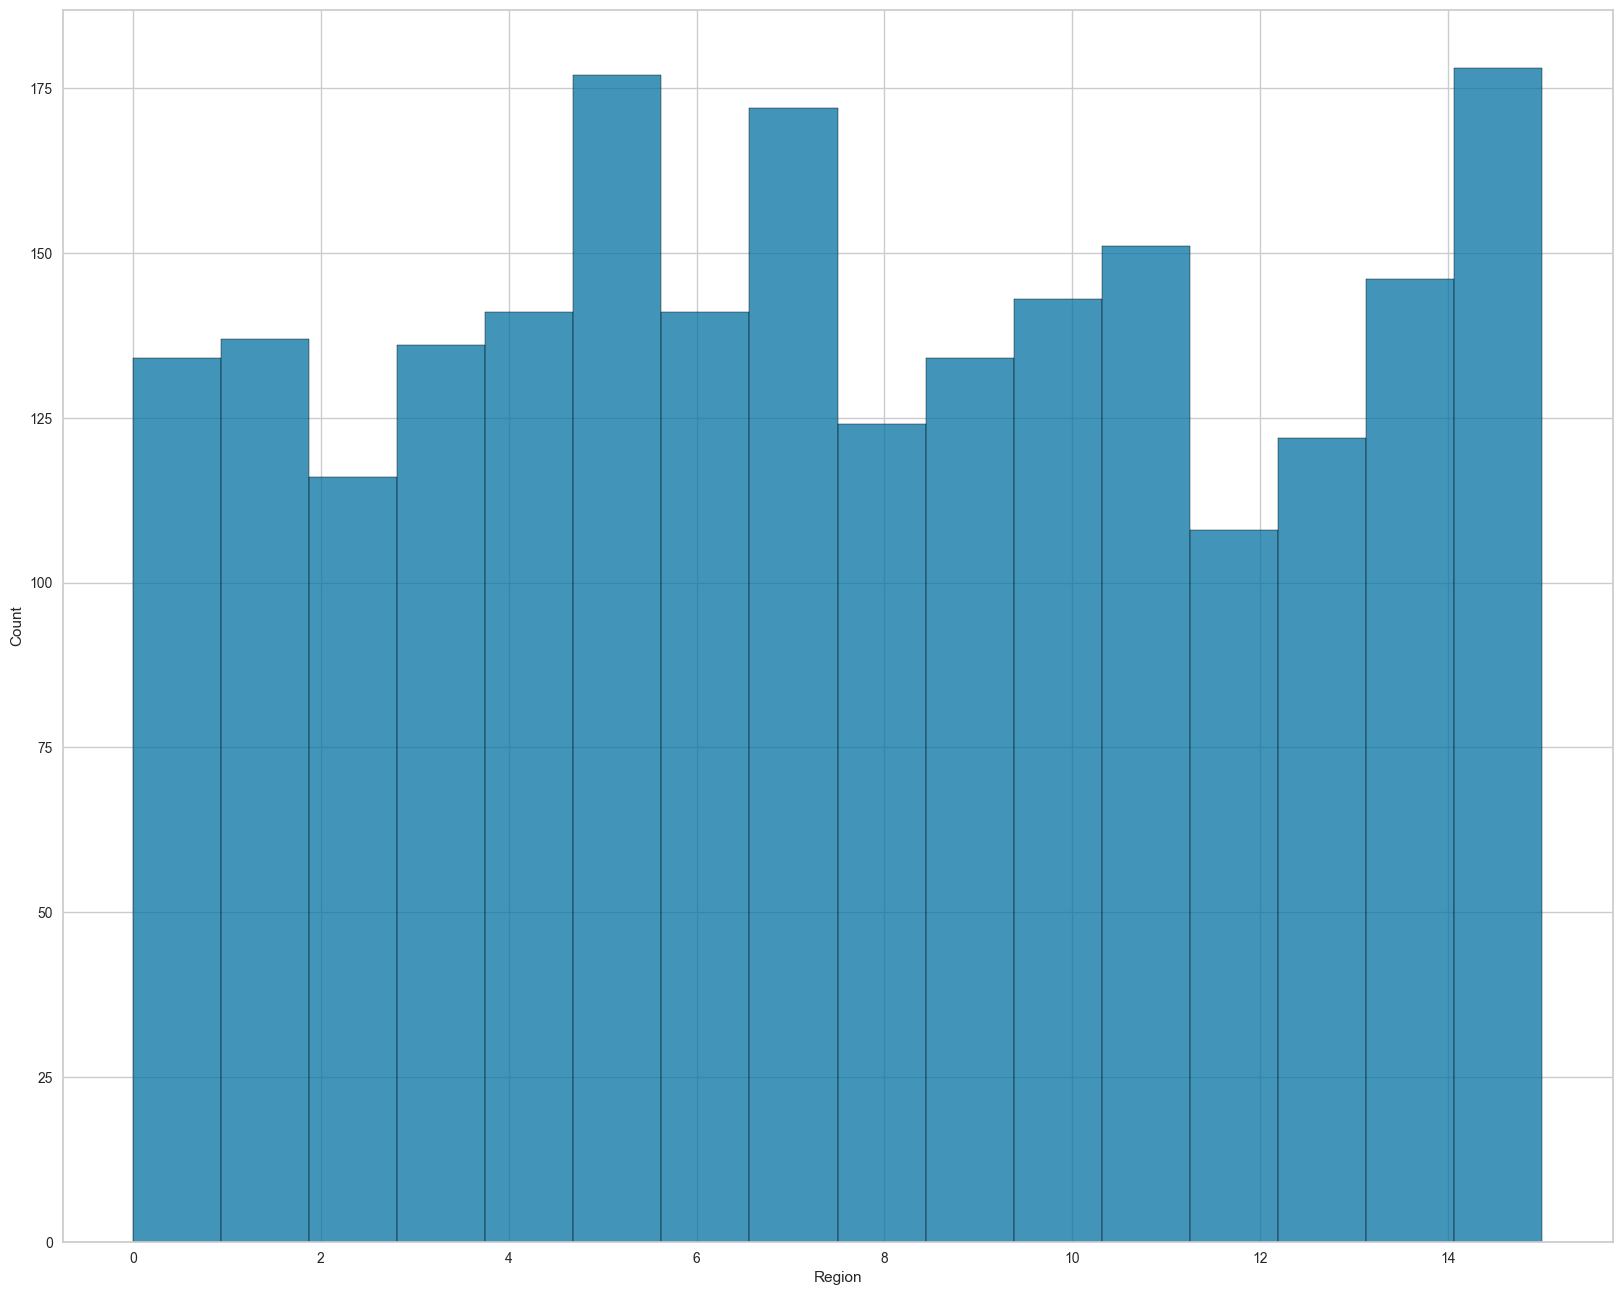

Cluster 1:
Modus
   Product  Category  Customer_Type  Region
0       20         2              1       7




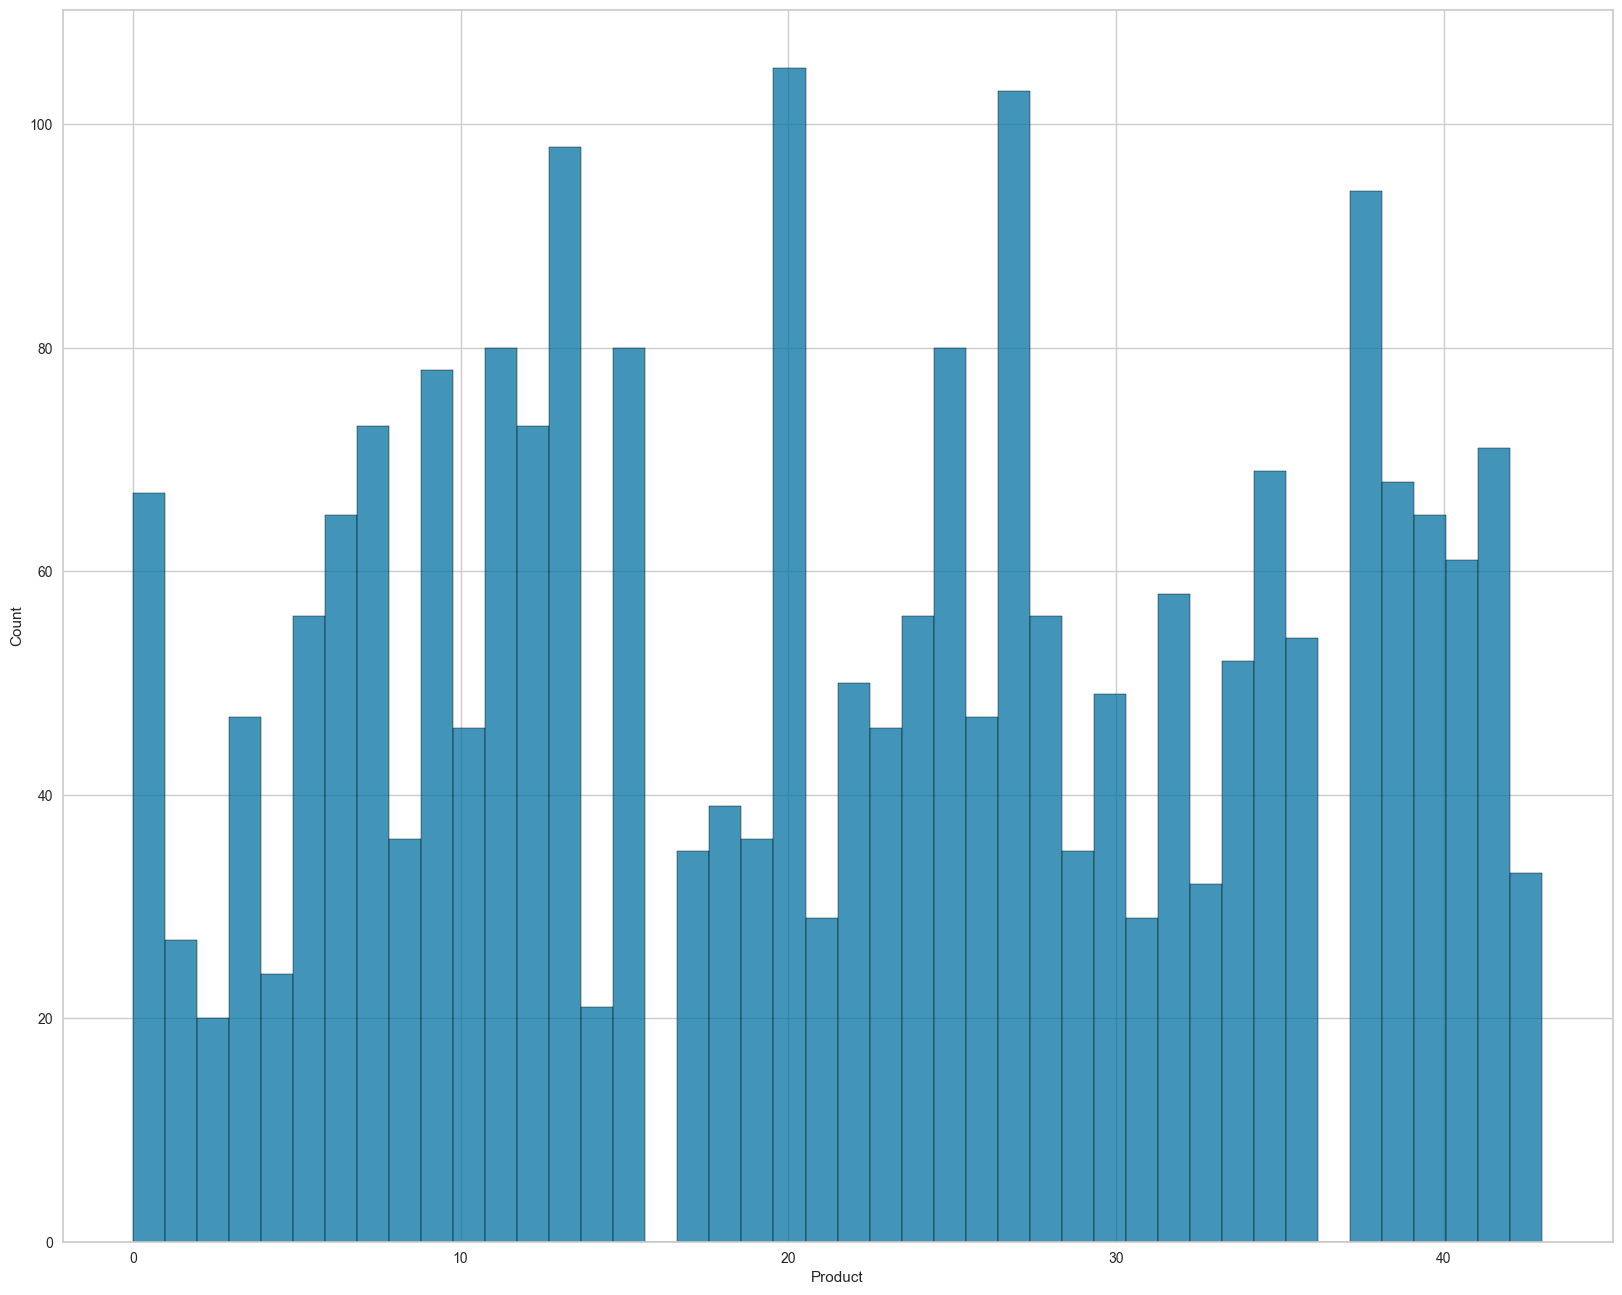

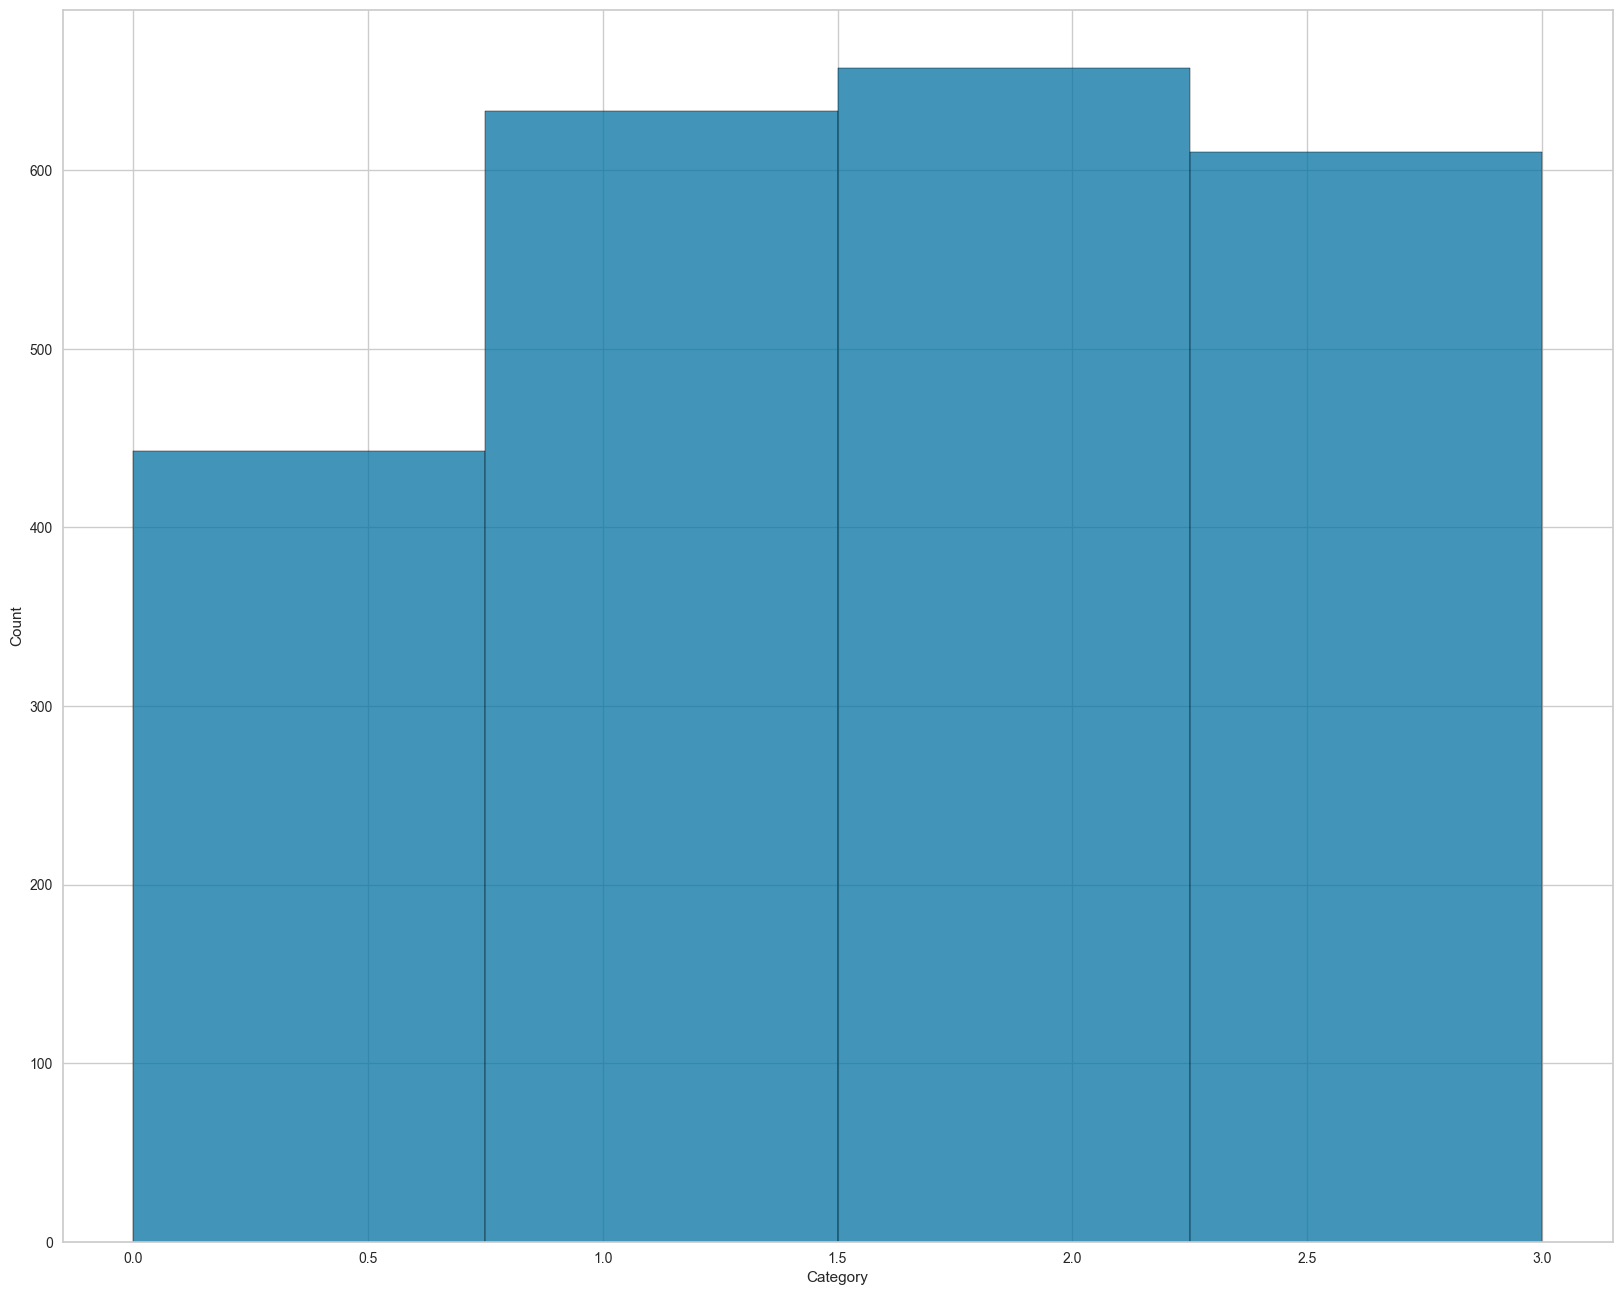

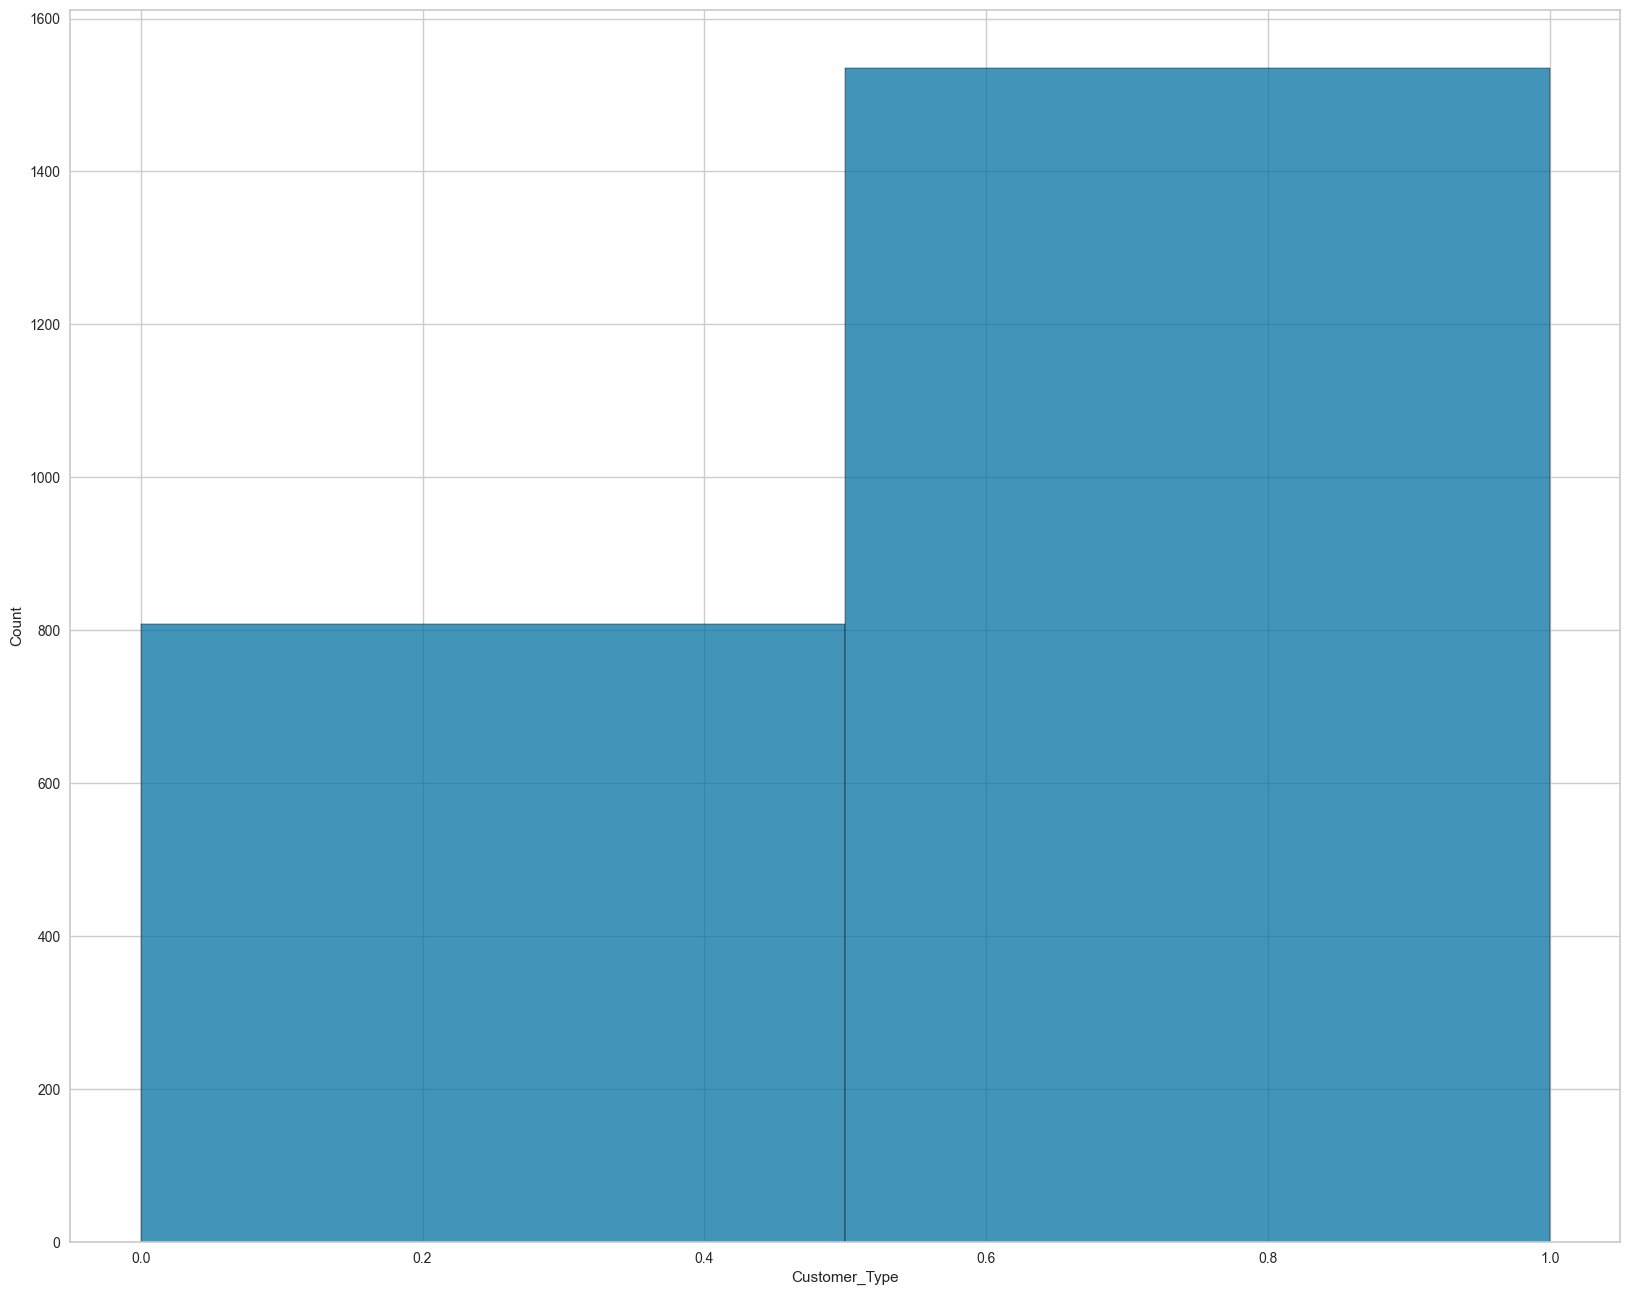

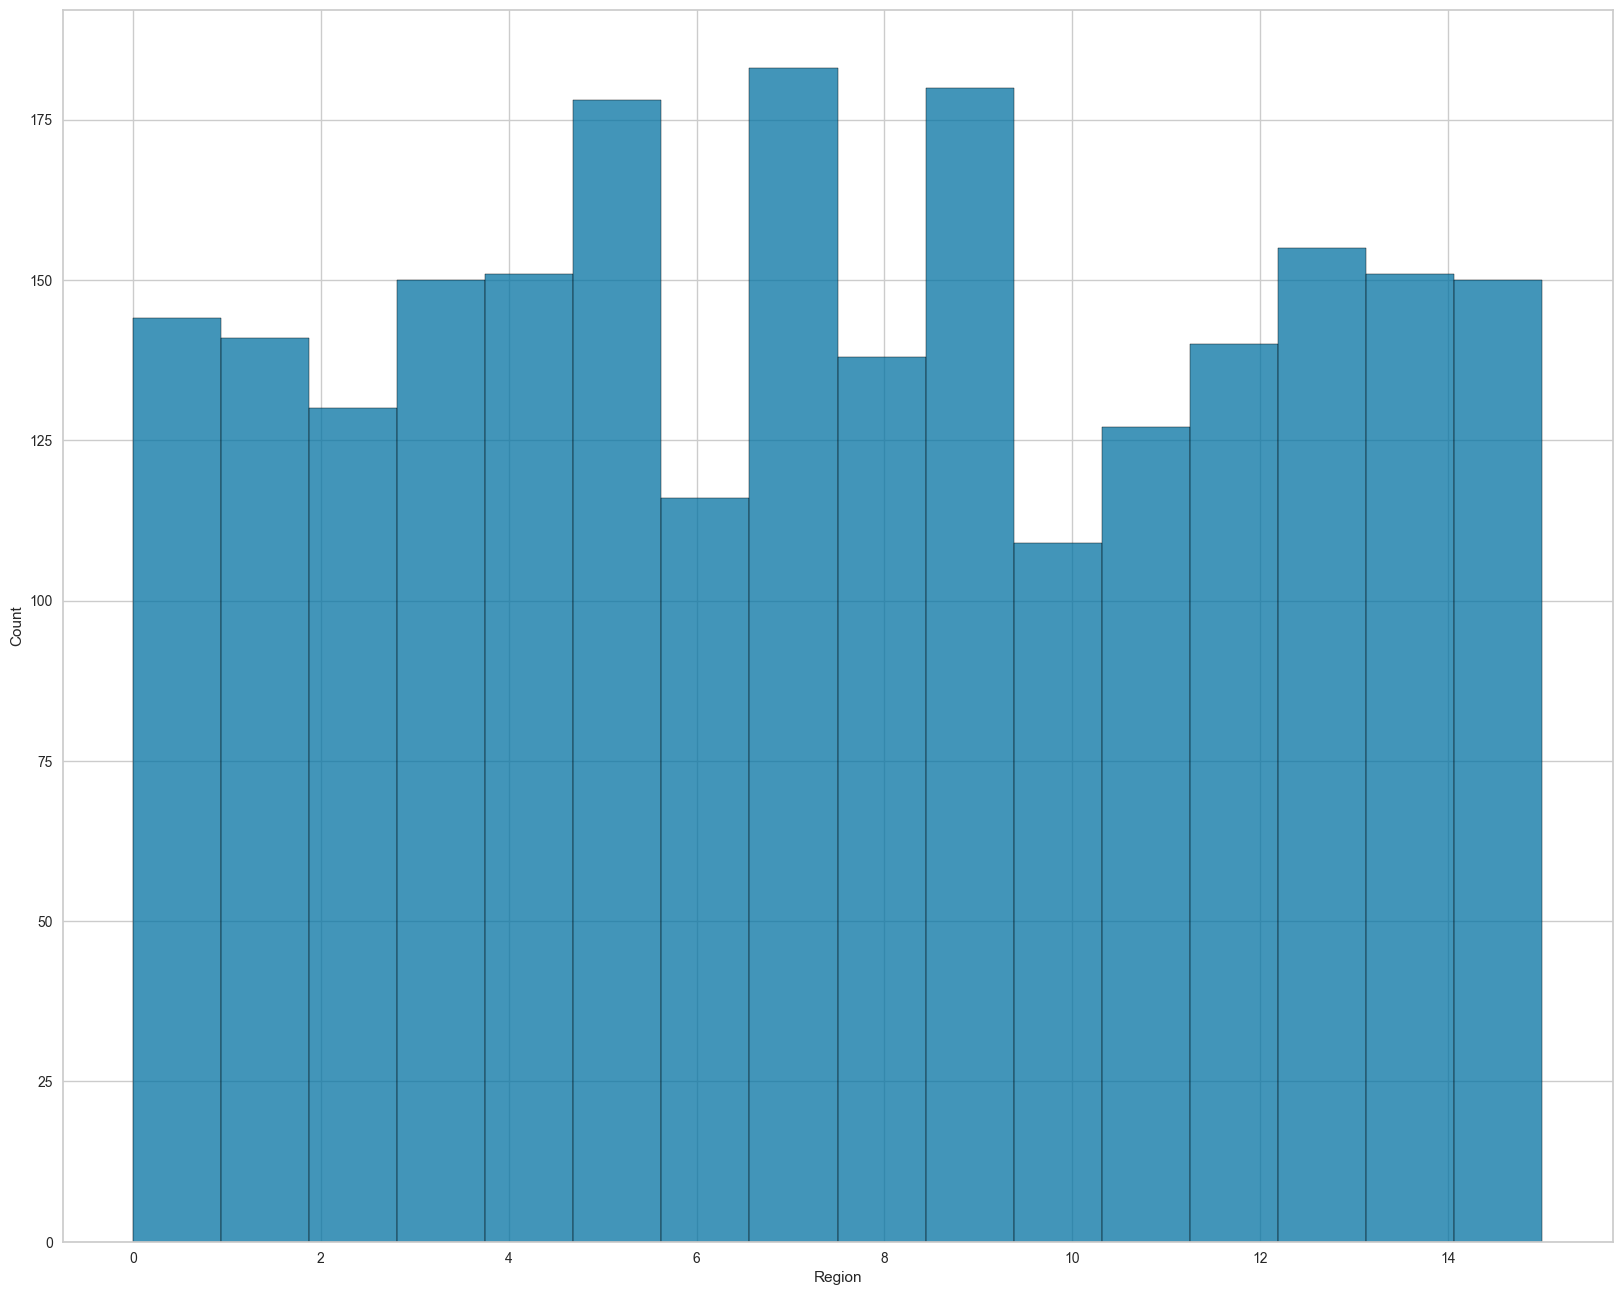

Cluster 2:
Modus
   Product  Category  Customer_Type  Region
0        7         1              1       5




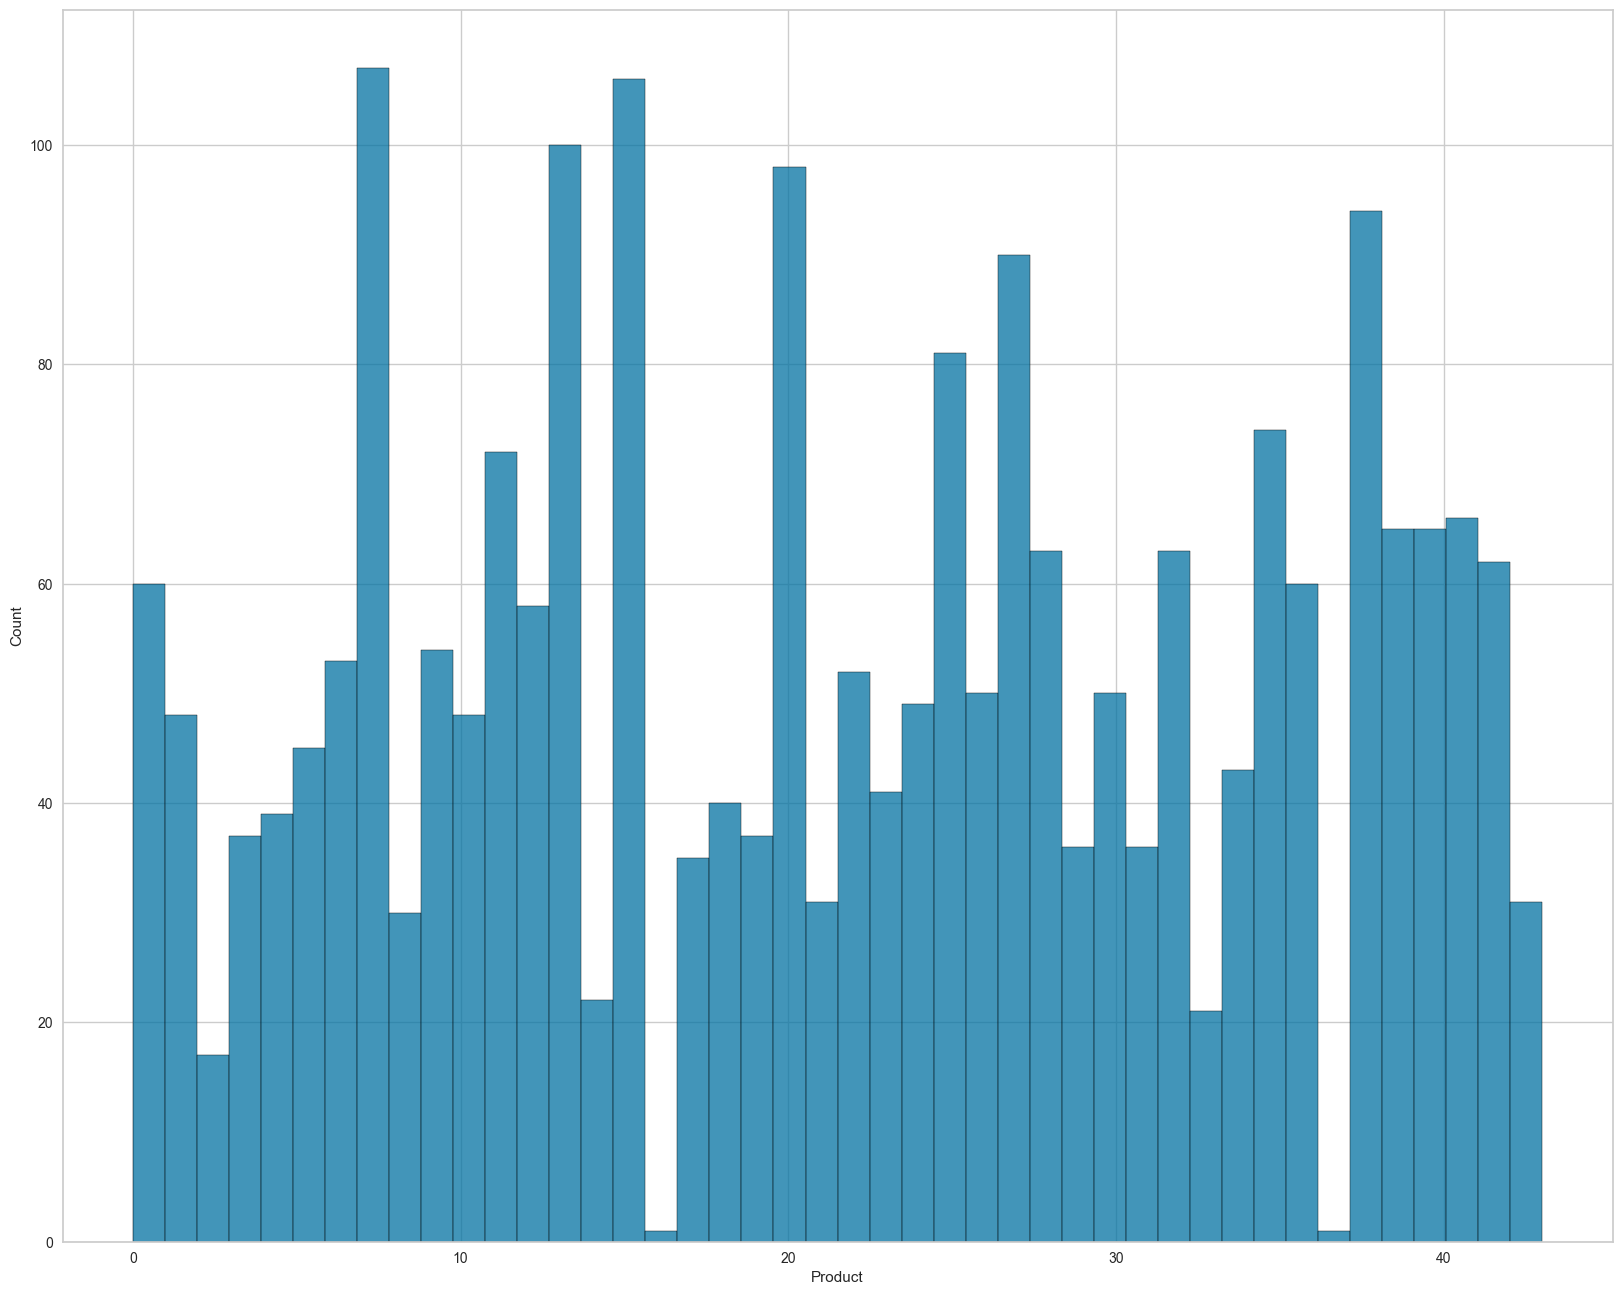

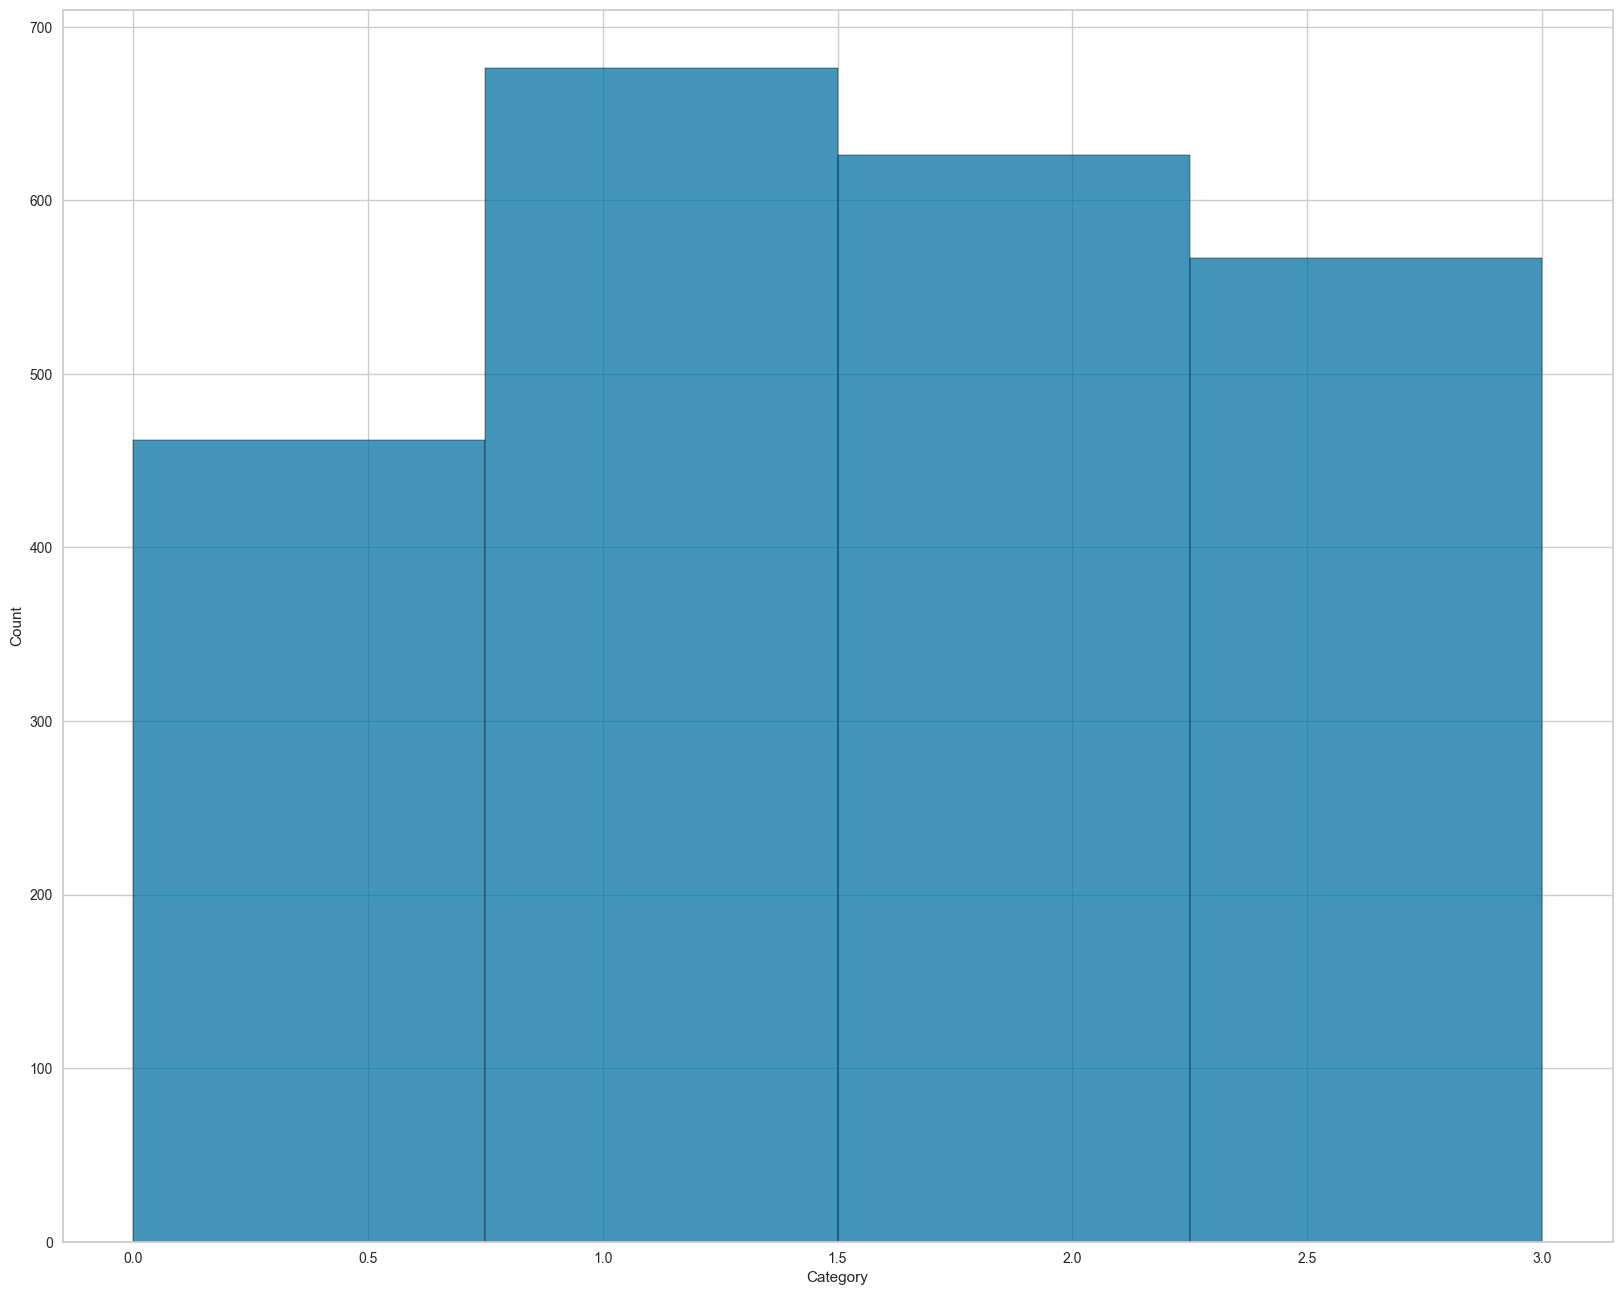

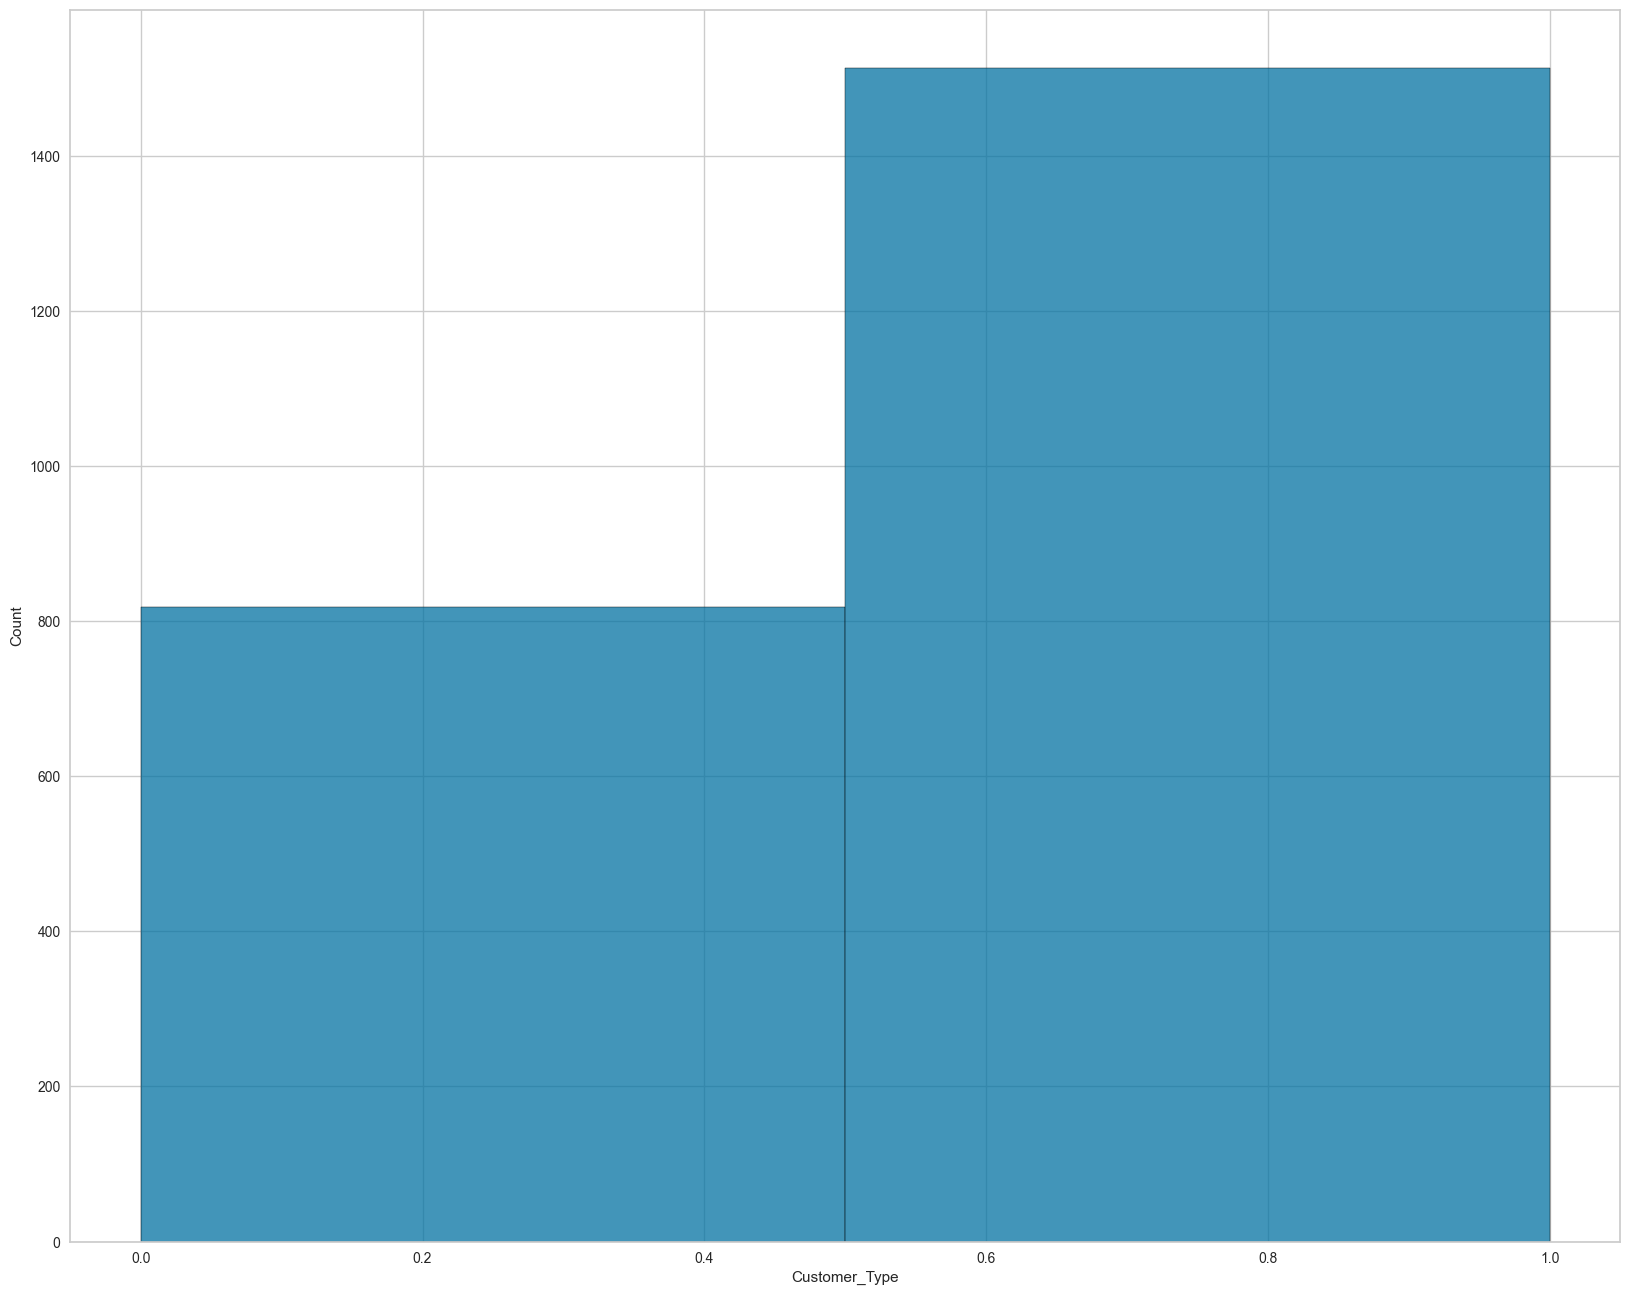

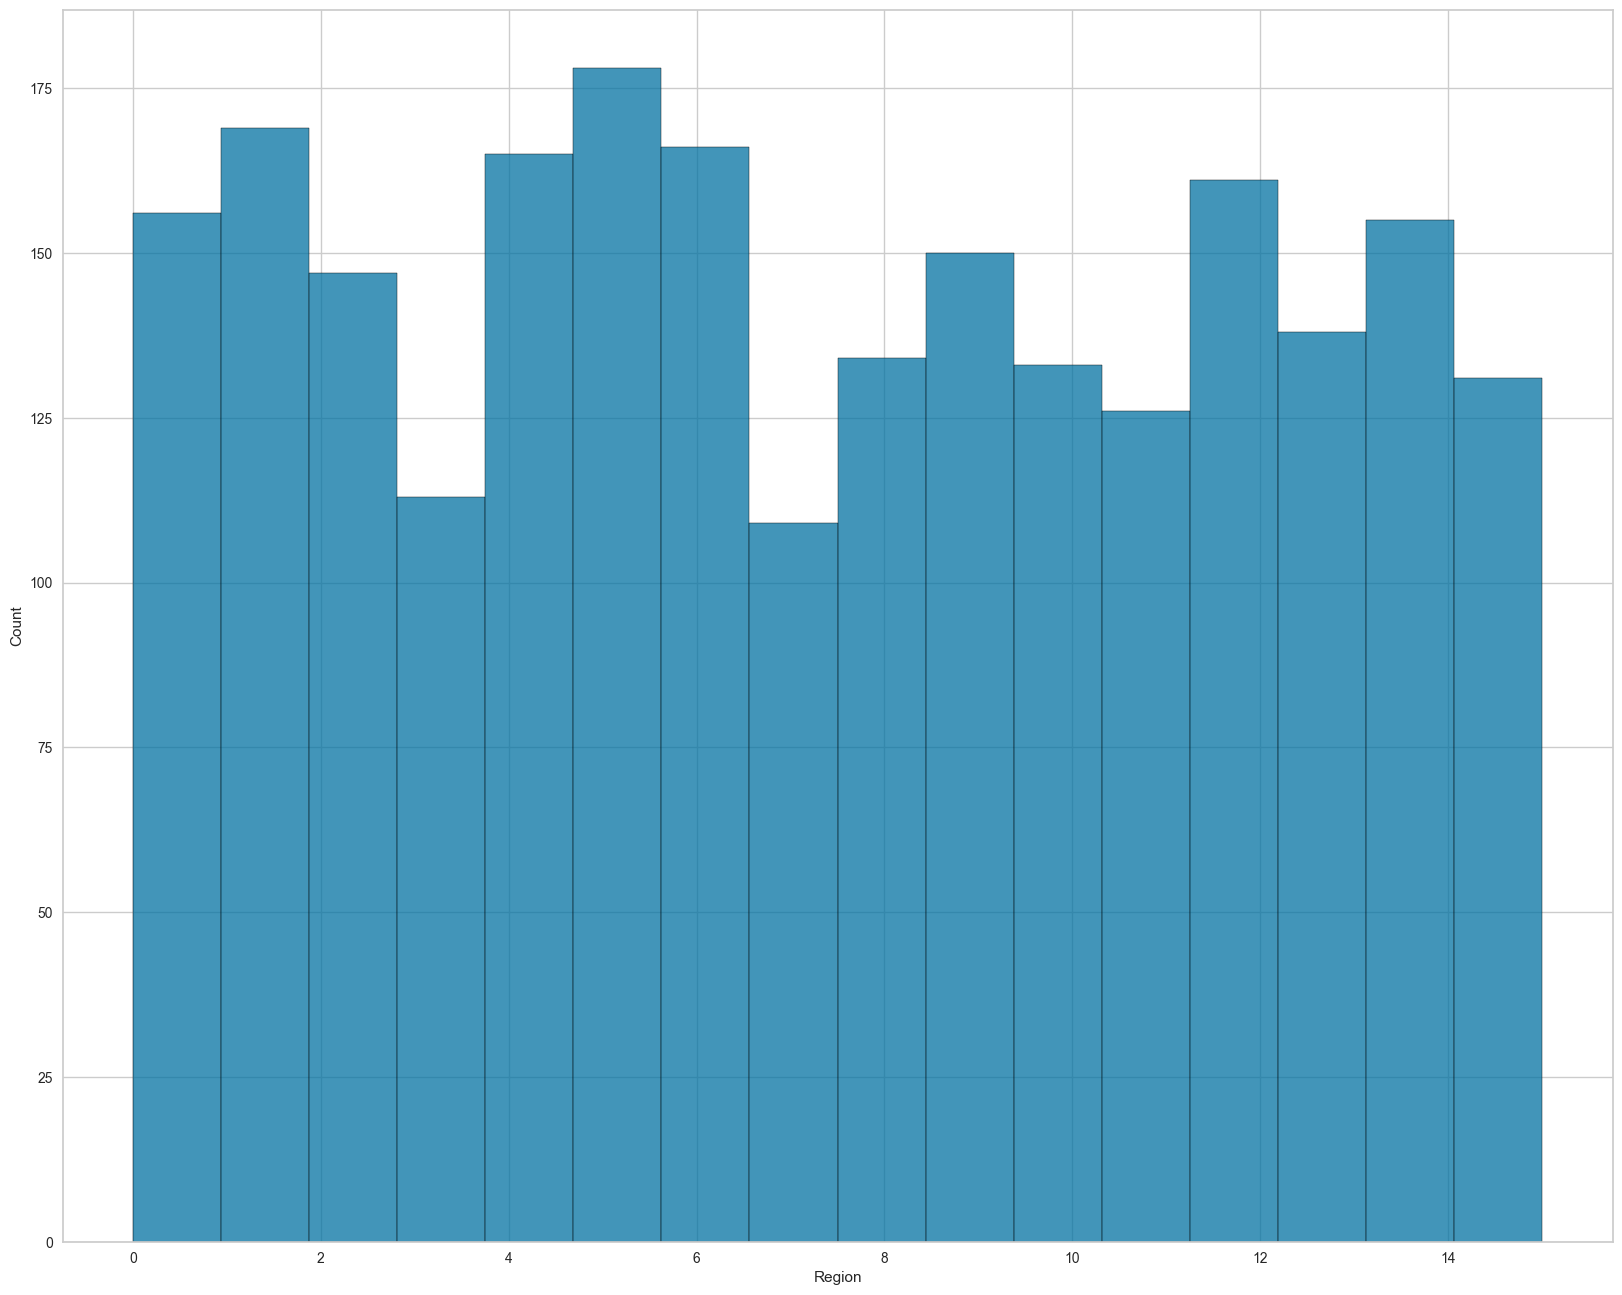

Cluster 3:
Modus
   Product  Category  Customer_Type  Region
0       13         2              1       4




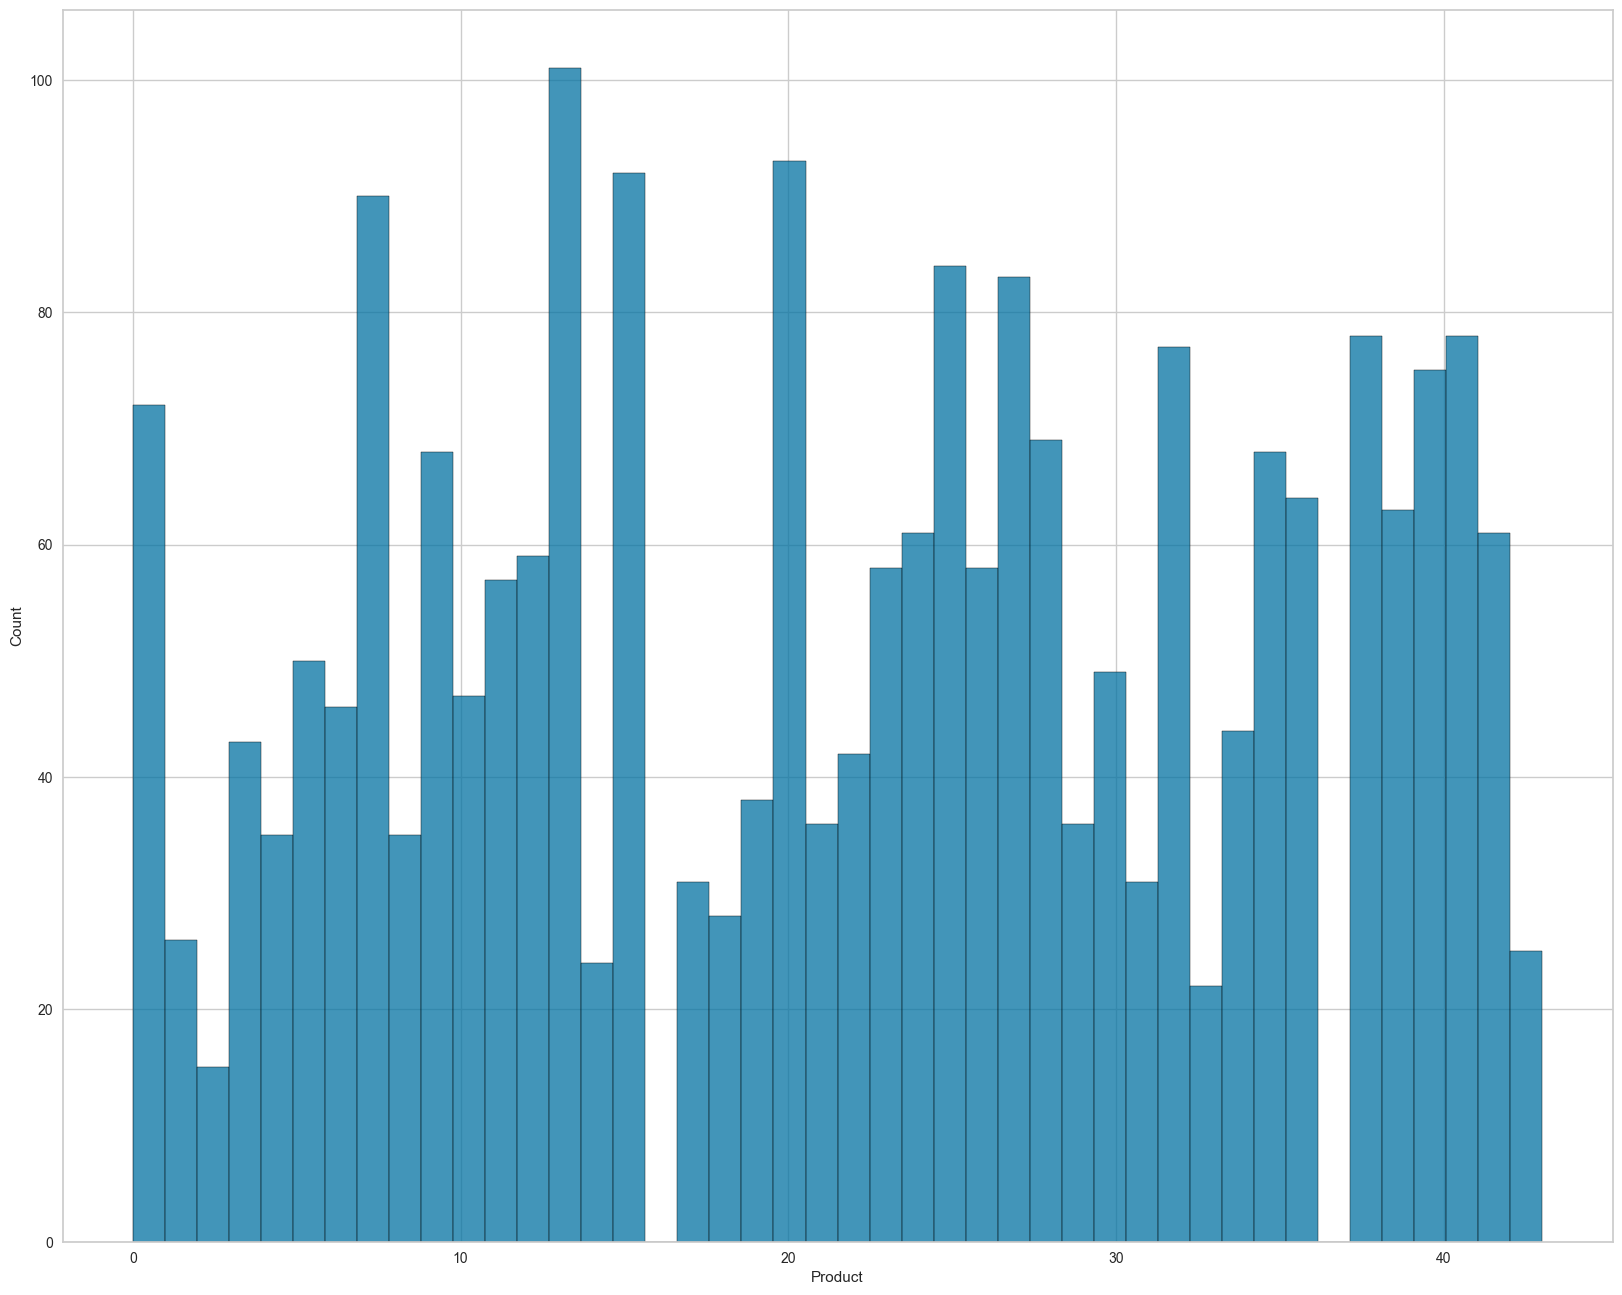

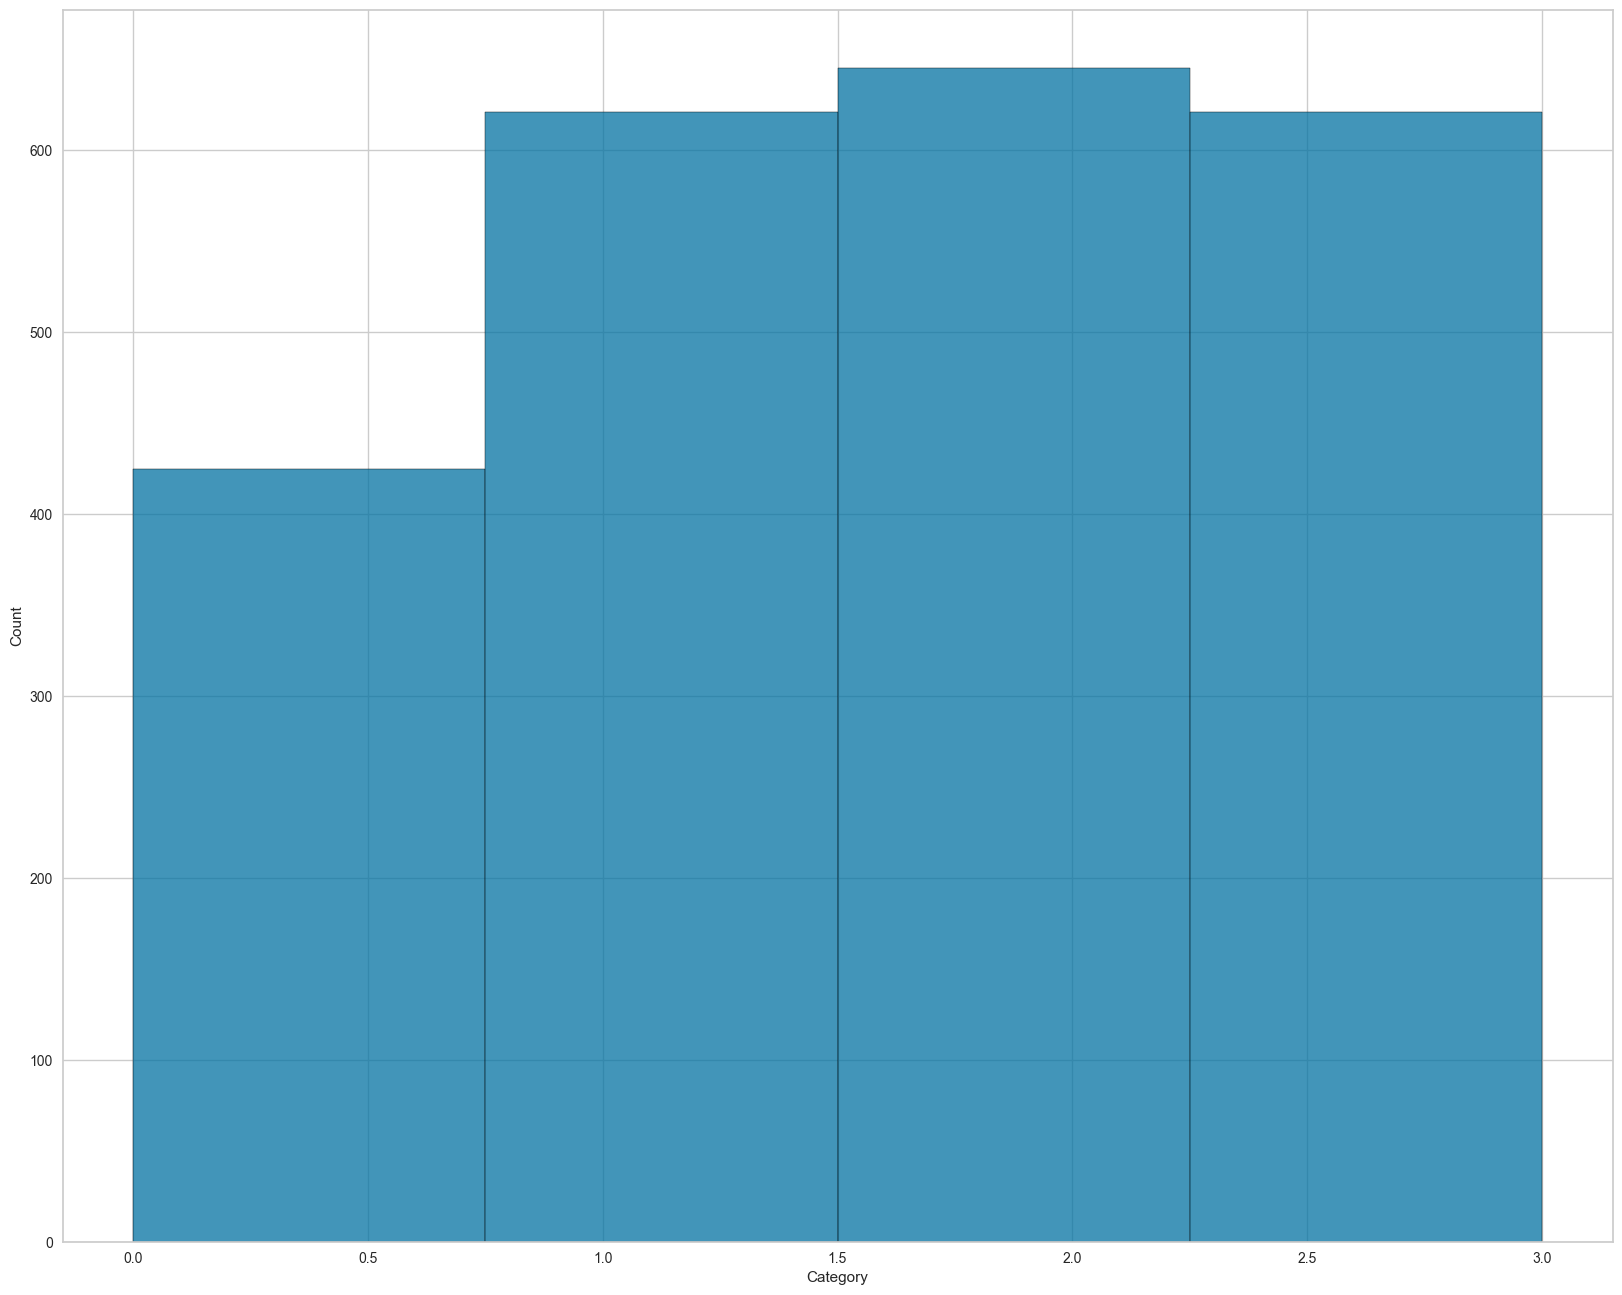

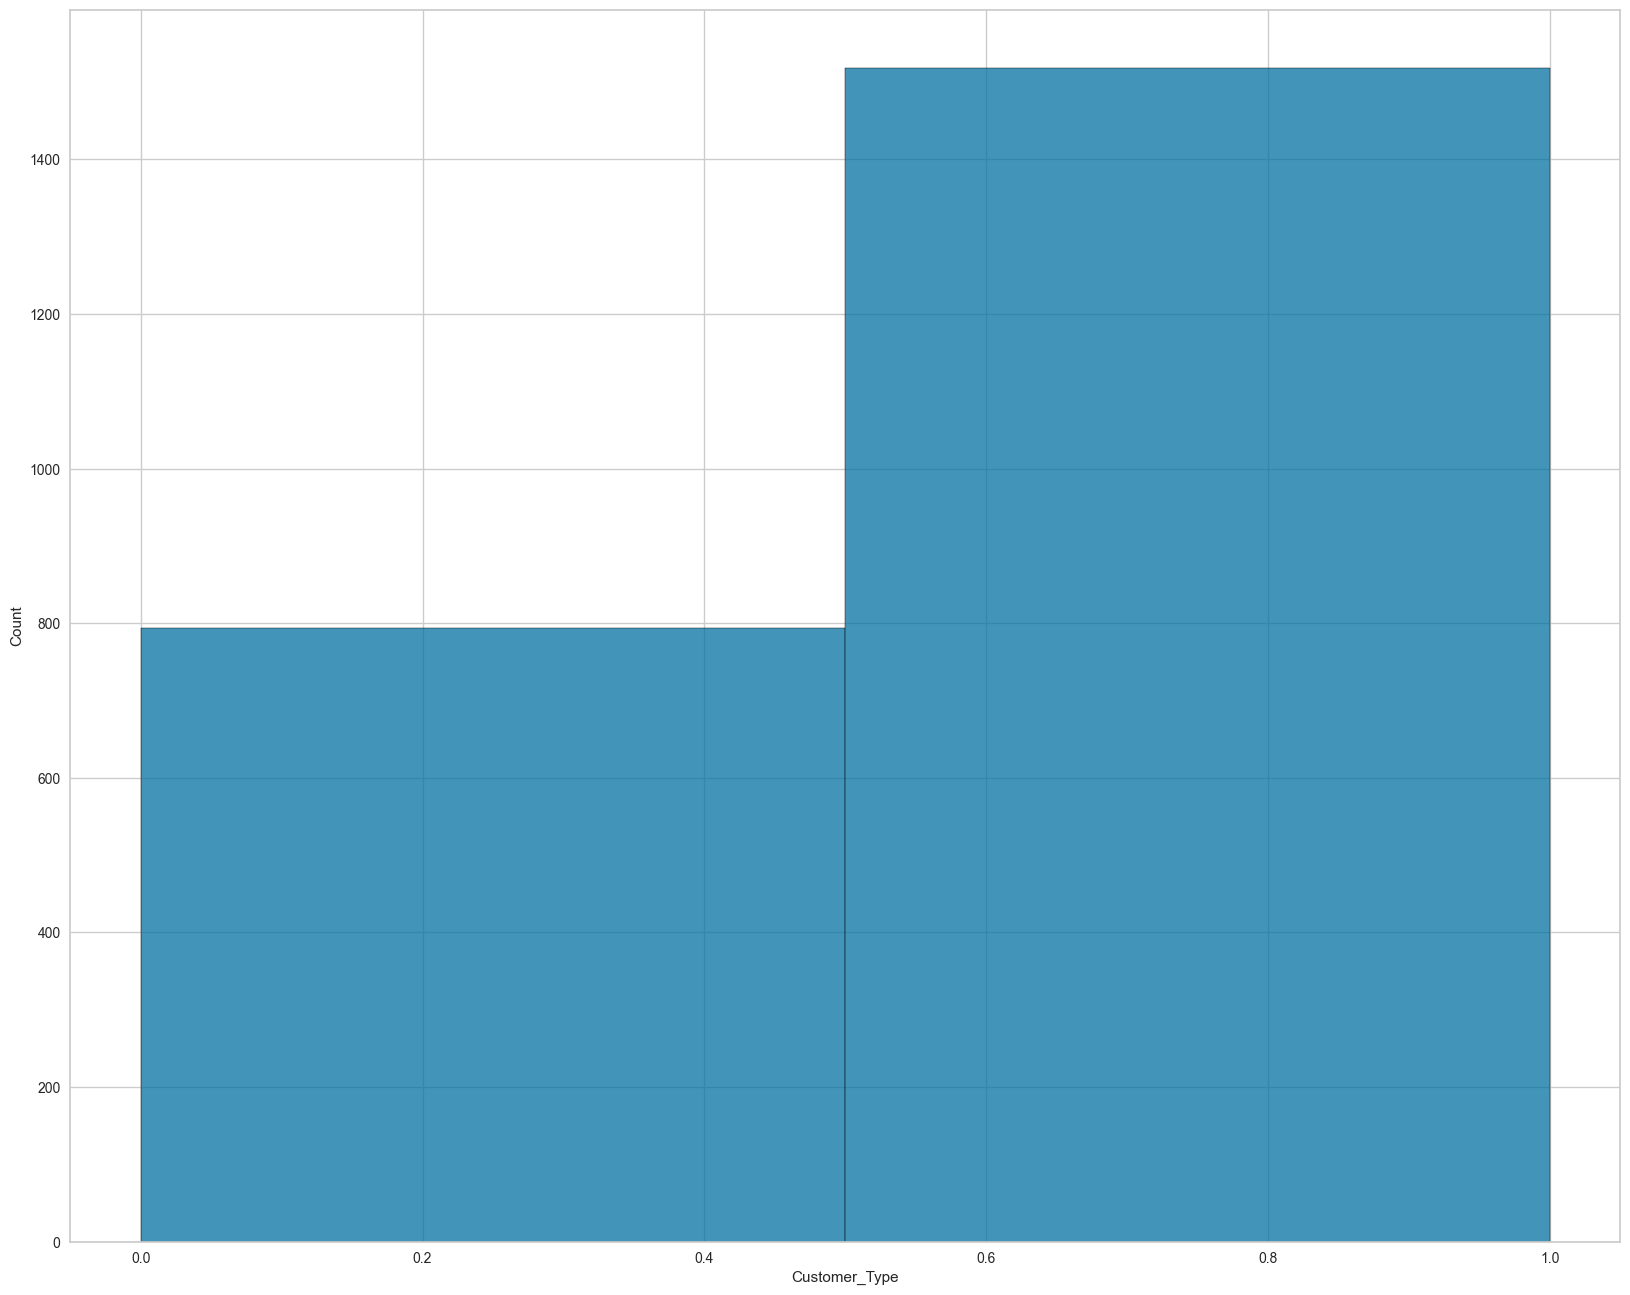

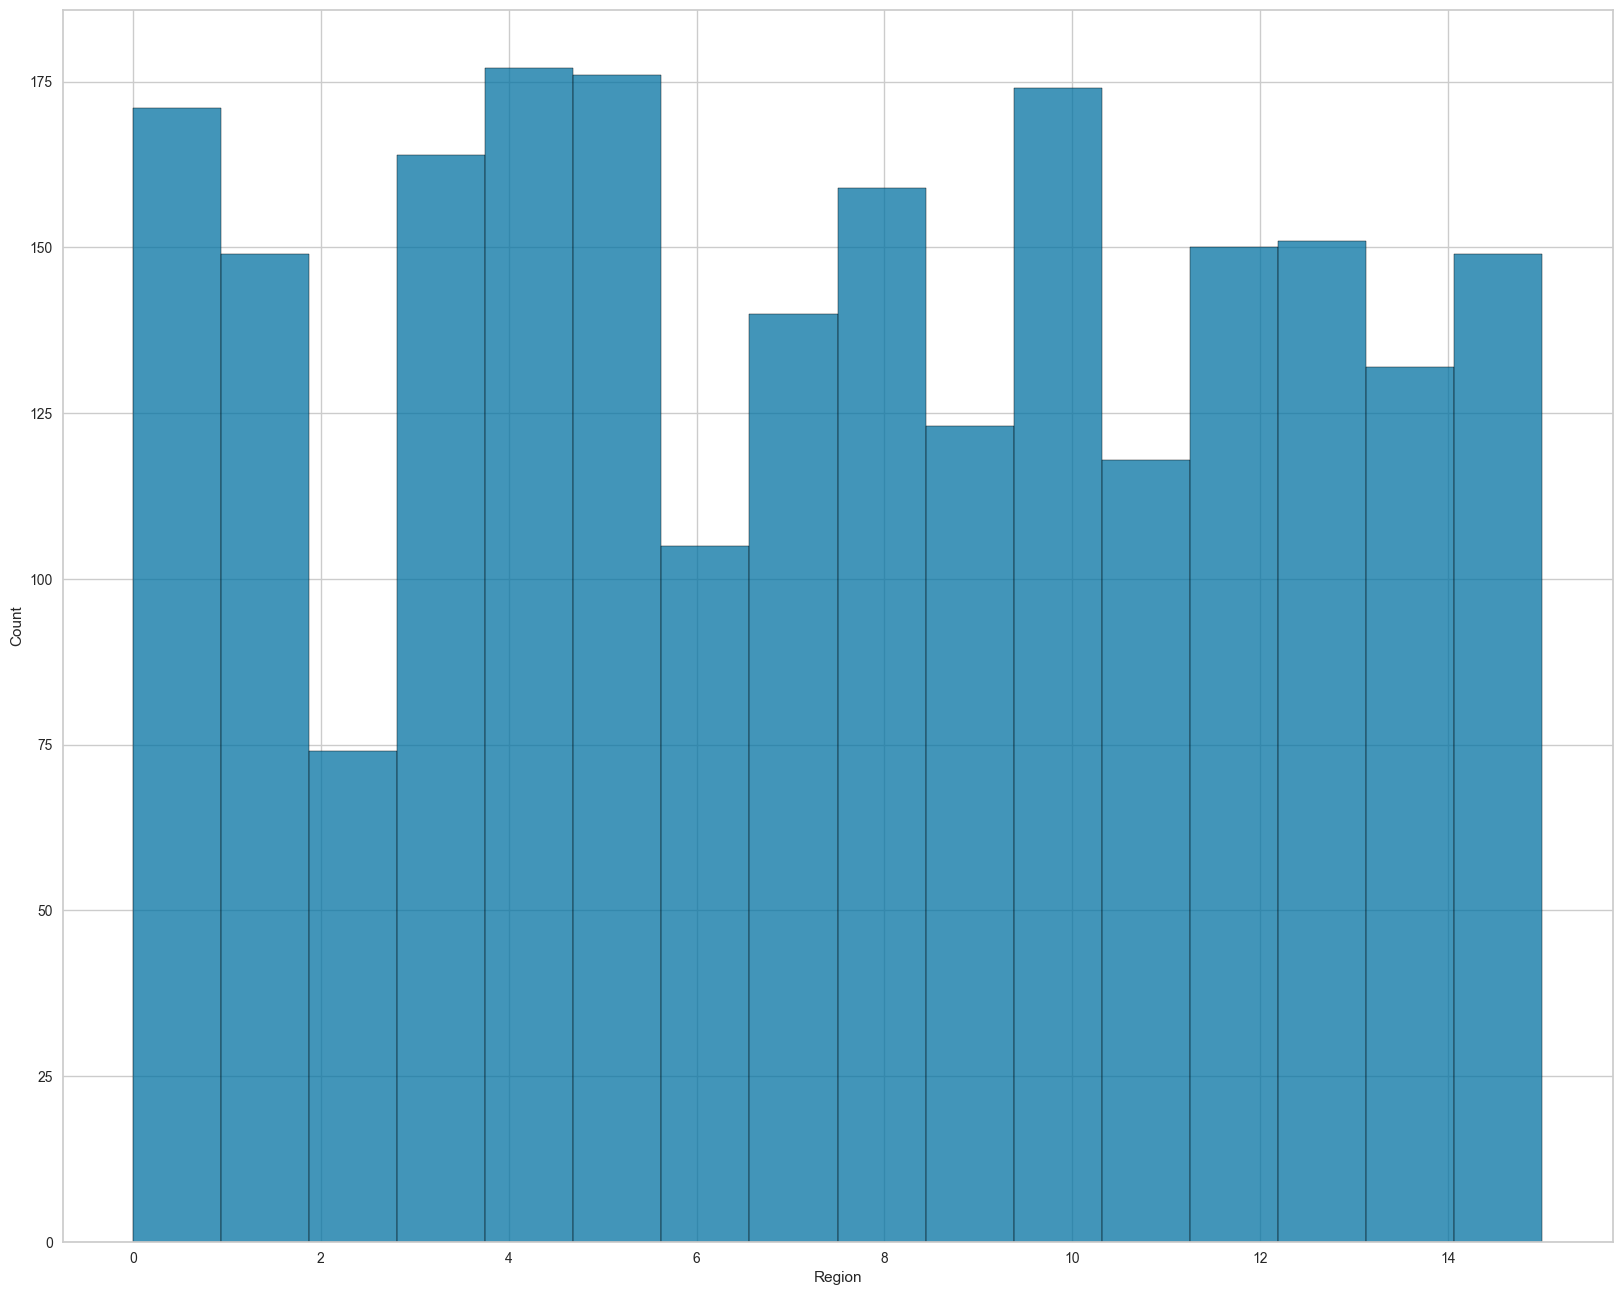

In [12]:
#Analisis karakteristik cluster
feature_for_analyze = ['Product', 'Category', 'Customer_Type', 'Region']

print("Label dan key")
for feature in feature_for_analyze:
    order_id_mapping = df[[feature]].drop_duplicates().copy()
    order_id_mapping['Grouped_ID'] = order_id_mapping.groupby(feature).ngroup()
    order_id_mapping = order_id_mapping.sort_values(by=feature)
    print(order_id_mapping)

def analyze_clusters(x, labels, k, feature_cols):
    print("Analisis Karakteristik Setiap Cluster (Data Numerik):")
    for cluster_id in range(k):
        cluster_data = x[labels == cluster_id][feature_cols]
        data_mean = cluster_data.mean()
        data_min = cluster_data.min()
        data_max = cluster_data.max()
        print(f"Cluster {cluster_id}:")
        print(f"Mean")
        print(data_mean)
        print(f"Min")
        print(data_min)
        print(f"Max")
        print(data_max)
        print("\n")

def analyze_clusters_kategori(x, labels, k, feature_for_analyze):
    print("Analisis Karakteristik Setiap Cluster (Data Kategorikal):")
    for cluster_id in range(k):
        cluster_data = x[labels == cluster_id][feature_for_analyze]
        data_modus = cluster_data.mode()
        print(f"Cluster {cluster_id}:")
        print(f"Modus")
        print(data_modus)
        print("\n")

        for feature in feature_for_analyze:
            max_val = cluster_data[feature].max()

            plt.figure(figsize=(20,16))
            sns.histplot(cluster_data[feature], bins=max_val+1)
            plt.show()
 
analyze_clusters(df, labels, 4, feature_cols)
analyze_clusters_kategori(df_normalized, labels, 4, feature_for_analyze)

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
### Rata-rata
- **Unit_Price :**      2.294403
- **Discount :**        0.026704
- **Quantity :**       21.550442
- **Total_Price :**    44.967619

### Nilai Minimum
- **Unit_Price :**     0.35
- **Discount :**       0.00
- **Quantity :**       1.00
- **Total_Price :**    0.56

### Nilai Maksimal
- **Unit_Price :**      16.38
- **Discount :**         0.15
- **Quantity :**       100.00
- **Total_Price :**    748.29

### Modus
- **Product :** Granini Apple & Rauch Multivitamin
- **Category :** Soft Drinks
- **Customer_Type :** B2C
- **Region :** Thüringen

## Cluster 1:
### Rata-rata
- **Unit_Price :**      2.250952
- **Discount :**        0.028809
- **Quantity :**       22.953905
- **Total_Price :**    46.529052

### Nilai Minimum
- **Unit_Price :**     0.34
- **Discount :**       0.00
- **Quantity :**       1.00
- **Total_Price :**    0.53

### Nilai Maksimal
- **Unit_Price :**      16.18
- **Discount :**         0.15
- **Quantity :**       100.00
- **Total_Price :**    752.76

### Modus
- **Product :** Mango Juice
- **Category :** Soft Drinks
- **Customer_Type :** B2C
- **Region :** Mecklenburg-Vorpommern

## Cluster 2:
### Rata-rata
- **Unit_Price :**      2.287756
- **Discount :**        0.028807
- **Quantity :**       23.521236
- **Total_Price :**    50.265980

### Nilai Minimum
- **Unit_Price :**     0.35
- **Discount :**       0.00
- **Quantity :**       1.00
- **Total_Price :**    0.53

### Nilai Maksimal
- **Unit_Price :**      16.64
- **Discount :**         0.15
- **Quantity :**       100.00
- **Total_Price :**    737.81

### Modus
- **Product :** Cranberry Juice
- **Category :** Juices
- **Customer_Type :** B2C
- **Region :** Hamburg

## Cluster 3:
### Rata-rata
- **Unit_Price :**      2.230398
- **Discount :**        0.028503
- **Quantity :**       22.311419
- **Total_Price :**    45.061384

### Nilai Minimum
- **Unit_Price :**     0.32
- **Discount :**       0.00
- **Quantity :**       1.00
- **Total_Price :**    0.53

### Nilai Maksimal
- **Unit_Price :**      16.22
- **Discount :**         0.15
- **Quantity :**       100.00
- **Total_Price :**    688.25

### Modus
- **Product :** Granini Apple
- **Category :** Soft Drinks
- **Customer_Type :** B2C
- **Region :** Bayern

### Analisis
Berdasarkan hasil dari data yang telah di klusterkan, nilai rata-rata, minimum dan maksimum tidak jauh berbeda antar kluster, namun modus antar kluster berbeda.

Kluster 0 dan Kluster 3 memiliki kesamaan dalam modus Product, Kategori dan Tipe Kustomer namun berbeda dalam modus region

Kluster 1 memiliki kesamaan dalam modus kategori dengan kluster 0 dan 3 namun berbeda dalam modus produk dan juga region

Kluster 2 tidak memiliki kesamaan dengan kluster lain kecuali dalam hal tipe kostumer yang dimana semua kluster memiliki modus tipe kluster yang sama

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [13]:
#Mengekspor Data
df_normalized['Cluster'] = kmeans.labels_
df_normalized.to_csv('Beverage_cluster_normalized.csv', index=False)